<h1>Name :<h1><h2>ABDALLAH IQELAN<h2>


In [1]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
df=pd.read_csv(r"C:\Users\abd50\Downloads\housing.csv",names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], delimiter=r"\s+")


In [3]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

<h1 style="color:rgb(177, 47, 241);">Data exploration</h1>

In [4]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

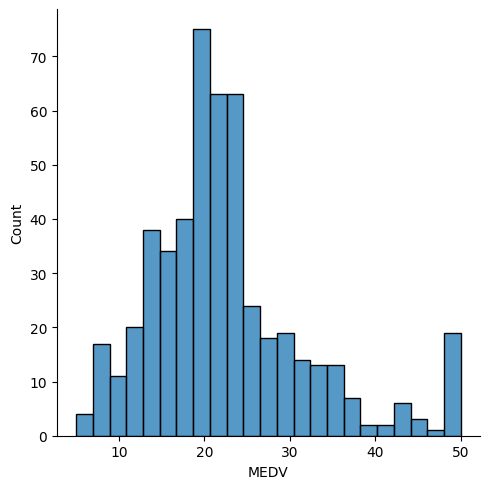

In [5]:
sns.displot(df.MEDV)

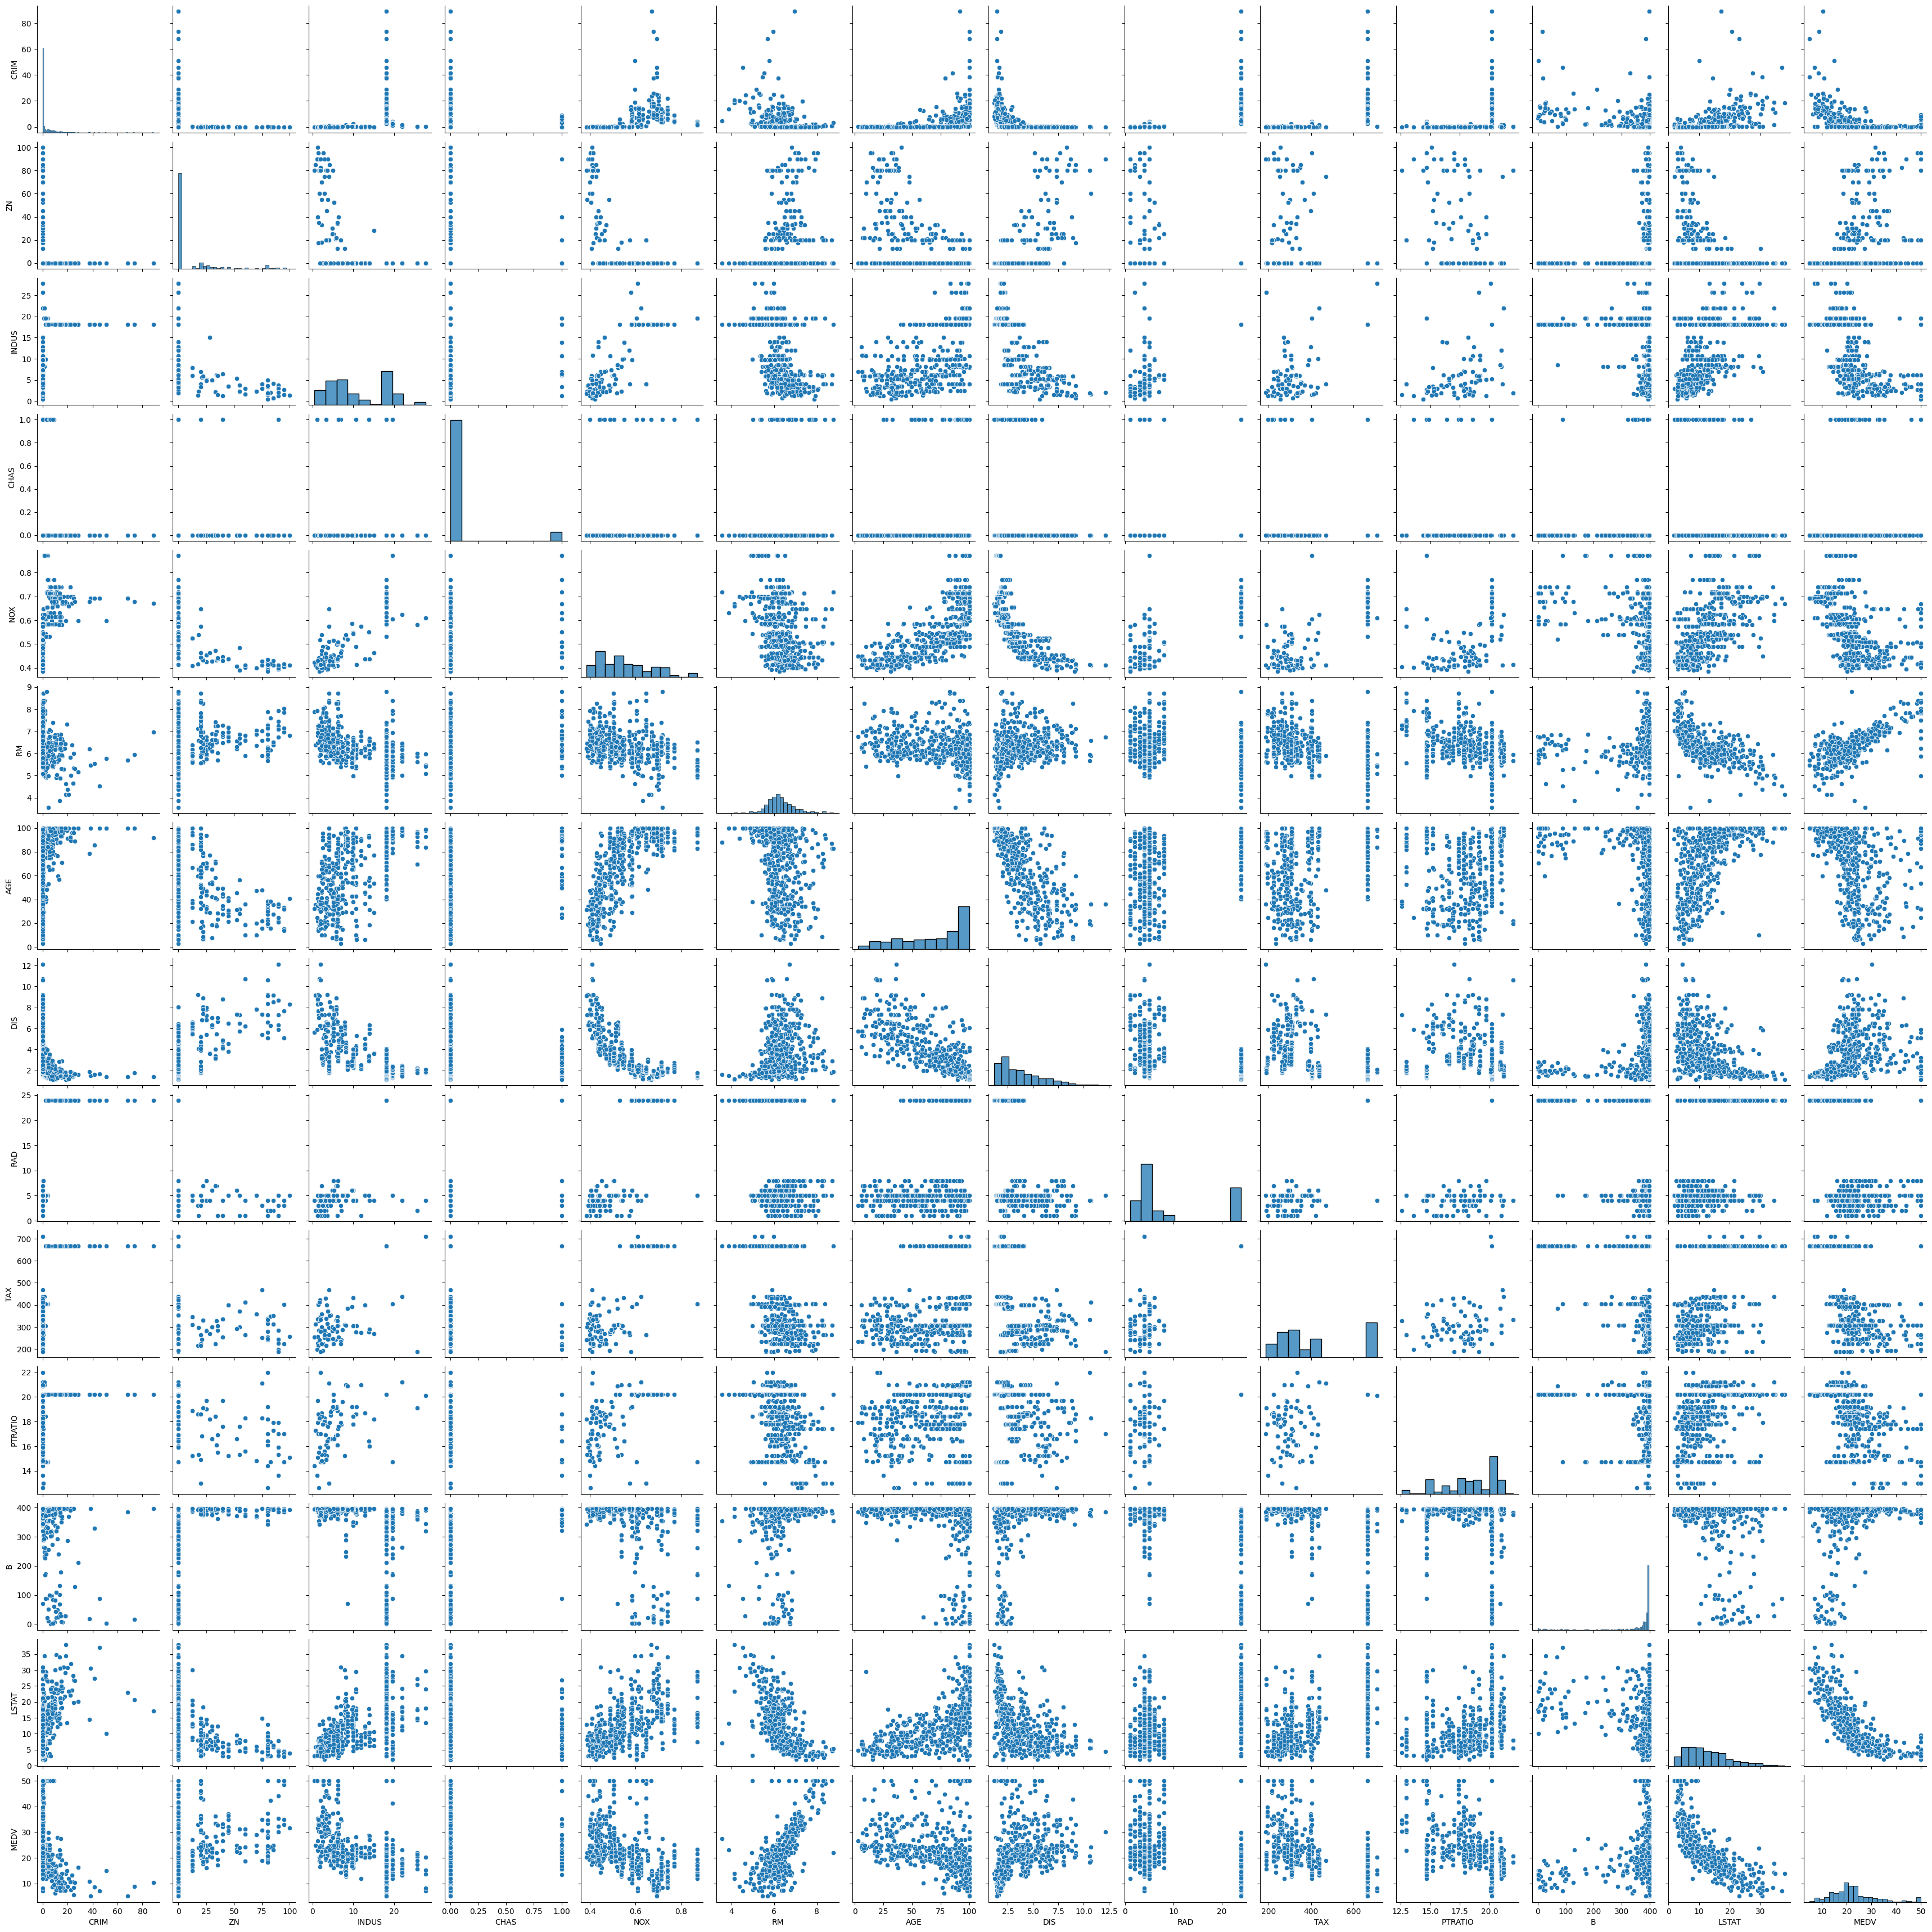

In [6]:
sns.pairplot(df)

<AxesSubplot:>

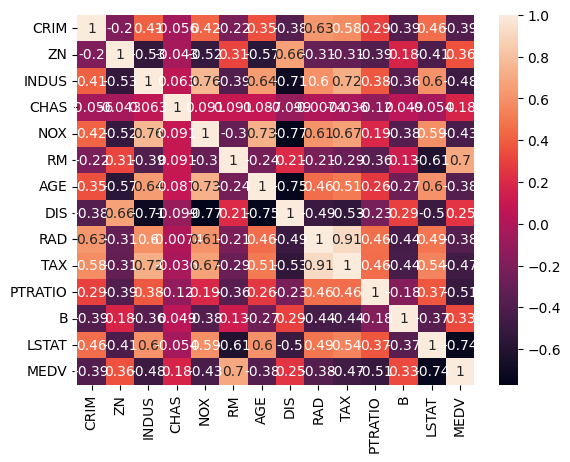

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
corr={"{},{}".format(i+1,x+1)  if (abs(np.corrcoef(df.iloc[:,i],df.iloc[:,x])[0,1]) > 0.7) else "": np.corrcoef(df.iloc[:,i],df.iloc[:,x])[0,1] if (abs(np.corrcoef(df.iloc[:,i],df.iloc[:,x])[0,1]) > 0.6) else ""   for i in range(df.shape[1]-1) for x in range(i+1,df.shape[1]-1)}
corr

{'': '',
 '3,5': 0.7636514469209149,
 '3,8': -0.7080269887427677,
 '3,10': 0.720760179951542,
 '5,7': 0.7314701037859586,
 '5,8': -0.7692301132258279,
 '7,8': -0.7478805408686319,
 '9,10': 0.9102281885331858}

<h1  style="color: rgb(177, 47, 241);" > Handling Missing Data</h1>
<h3>I use the K neighbors algorithm to handle with missing data because it looks more realistic and maintains data quality</h3>

In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")#distance or uniform
imputer.fit_transform(df)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

<h3>rescaling data to find optimal feature that  have the greatest impact on output</h3>
<h5>i use normalization to make range every feature the same range other</h5>
<h1>X-mean/Max(X)-Min(x)<h1>

In [10]:
from sklearn.preprocessing import MinMaxScaler 
# Let's scale the columns before plotting them against MEDV
min_max_scaler = MinMaxScaler(feature_range=(0,10))
X_NO=min_max_scaler.fit_transform(df.iloc[:,:-1])


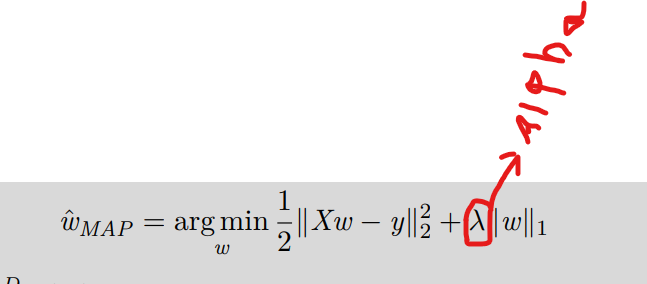

In [11]:
from sklearn import linear_model
LasRe = linear_model.LassoLars(alpha=.04)
LasRe.fit(X_NO,df.iloc[:,-1])
LasRe.coef_

c:\Users\abd50\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoLars(alpha=0.04)

array([ 0.        ,  0.        ,  0.        ,  0.03310685,  0.        ,
        2.05846548,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.60626741,  0.11093256, -1.80785955])

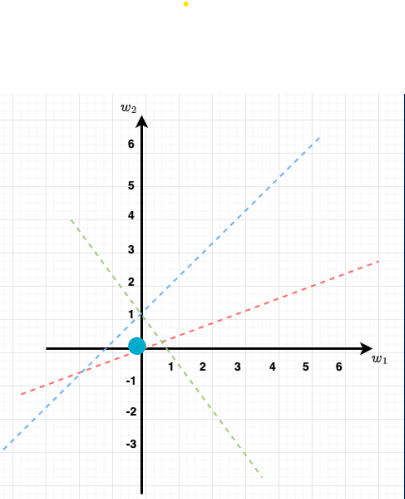
<h4>This information tells us that the average number of rooms per dwelling is the best feature then lower status of the population </h4>


In [12]:
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestRegressor
FS_RF = RandomForestRegressor(random_state=42, n_estimators=500)
RFmodel = SelectFromModel(FS_RF)
RFmodel.fit( X_NO, df.iloc[:,-1])
print("Random Forest Reg {}".format(RFmodel.get_support()))
##########################################################################
FS_LR = linear_model.LinearRegression()
LRmodel = SelectFromModel(FS_LR)
LRmodel.fit( X_NO, df.iloc[:,-1])
print("Linear regression {}".format(LRmodel.get_support()))
####################################################################
Las = linear_model.LassoLars(alpha=.015)
Lmodel = SelectFromModel(Las)
Lmodel.fit( X_NO, df.iloc[:,-1])
print("lasso {}".format(Lmodel.get_support()))
#######################################################
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression,f_regression
fselcet=SelectPercentile(score_func=mutual_info_regression ,percentile=61 )
fselcet2=SelectPercentile(score_func=f_regression ,percentile=61 )
fselcet.fit( X_NO , df.iloc[:,-1] )
fselcet2.fit( X_NO, df.iloc[:,-1])
print("percentile mutual_info_reg {}".format(fselcet.get_support()))
print("percentile f_reg {} ".format(fselcet2.get_support()))


SelectFromModel(estimator=RandomForestRegressor(n_estimators=500,
                                                random_state=42))

Random Forest Reg [False False False False False  True False False False False False False
  True]


SelectFromModel(estimator=LinearRegression())

Linear regression [ True False False False  True  True False  True False False  True False
  True]


c:\Users\abd50\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


SelectFromModel(estimator=LassoLars(alpha=0.015))

lasso [ True False False  True  True  True False  True False False  True  True
  True]


SelectPercentile(percentile=61,
                 score_func=<function mutual_info_regression at 0x00000211FF246708>)

SelectPercentile(percentile=61,
                 score_func=<function f_regression at 0x00000211FF232AF8>)

percentile mutual_info_reg [ True False  True False  True  True  True False False  True  True False
  True]
percentile f_reg [ True False  True False  True  True False False  True  True  True False
  True] 


In [13]:
print("Random Forest Reg")
RFmodel.get_support()
print("Linear regression")
LRmodel.get_support()
print("lasso")
Lmodel.get_support()
print("percentile mutual_info_reg ")
fselcet.get_support()
print("percentile f_reg  ")
fselcet2.get_support()

Random Forest Reg


array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True])

Linear regression


array([ True, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True])

lasso


array([ True, False, False,  True,  True,  True, False,  True, False,
       False,  True,  True,  True])

percentile mutual_info_reg 


array([ True, False,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True])

percentile f_reg  


array([ True, False,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=44,shuffle=True)
from sklearn import metrics
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR_f=LR.fit(X_train,y_train)
y_pred=LR_f.predict(X_test)
#y_predlin=LR_f.predict(XX)
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred,multioutput="uniform_average"))#'raw_values', 'uniform_average', 'variance_weighted'
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.431869322276151
Mean Squared Error: 21.43914952364959
Root Mean Squared Error: 4.630242922747098


<h1>f_regression</h1>

In [15]:
y=df.iloc[:,-1]
X=fselcet2.transform(df.iloc[:,:-1])
#X=df.loc[:,[ True, False,  True, False,  True,  True, False, False,  True, True,  True, False,  True,False]]

c:\Users\abd50\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectPercentile was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [16]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=44,shuffle=True)
from sklearn import metrics
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR_f=LR.fit(X_train1,y_train1)
y_pred1=LR_f.predict(X_test1)
#y_predlin=LR_f.predict(XX)
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test1, y_pred1,multioutput="uniform_average"))#'raw_values', 'uniform_average', 'variance_weighted'
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test1, y_pred1))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 3.406395345183527
Mean Squared Error: 21.8323690885017
Root Mean Squared Error: 4.672512074730434


<h1 style="color:rgb(177, 47, 241);">Standerization</h1>
x-mean/standard deviation

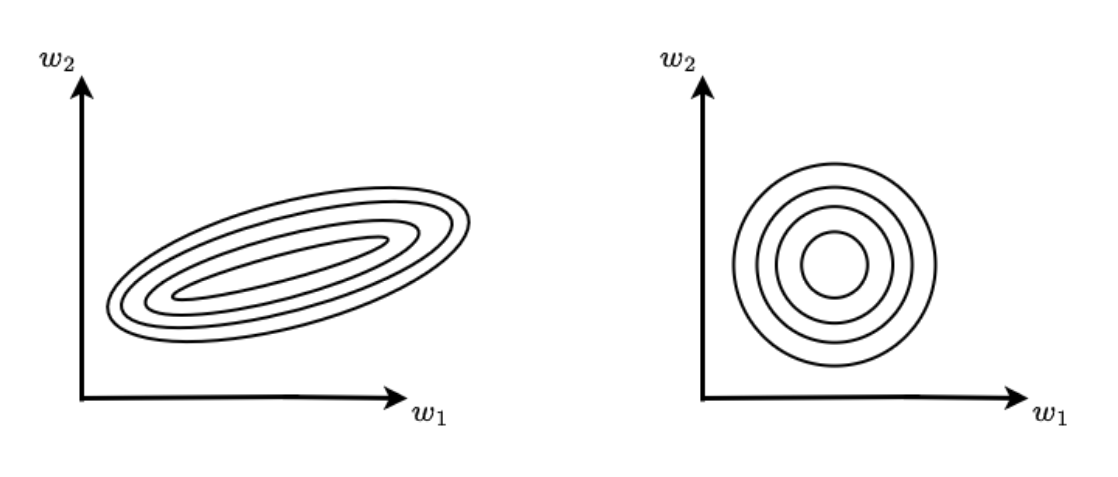

In [17]:

from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3,random_state=44,shuffle=True)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train2 = sc.fit_transform(X_train2)
#scaling the test set
X_test2 = sc.transform (X_test2)
from sklearn import metrics
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR_f=LR.fit(X_train2,y_train2)
y_pred2=LR_f.predict(X_test2)
#y_predlin=LR_f.predict(XX)
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test2, y_pred2,multioutput="uniform_average"))#'raw_values', 'uniform_average', 'variance_weighted'
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test2, y_pred2))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

Mean Absolute Error: 3.4063953451835305
Mean Squared Error: 21.832369088501657
Root Mean Squared Error: 4.672512074730429


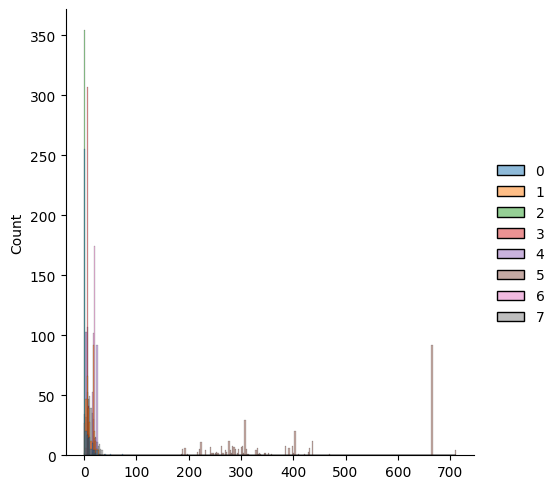

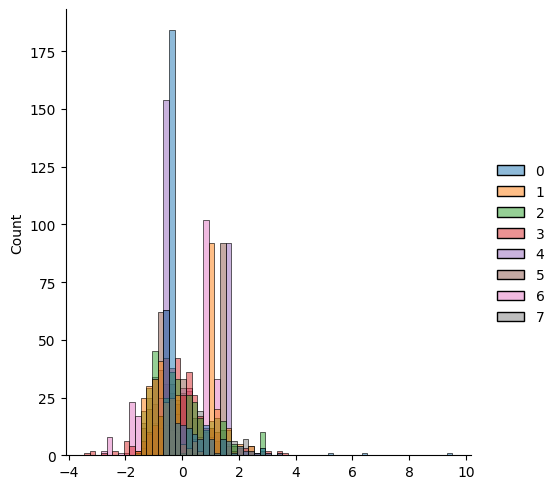

In [18]:
sns.displot(X_train1)
sns.displot(X_train2)

c:\Users\abd50\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\abd50\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1188: UserWarning: No contour levels were found within the data range.
  **contour_kws,


c:\Users\abd50\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


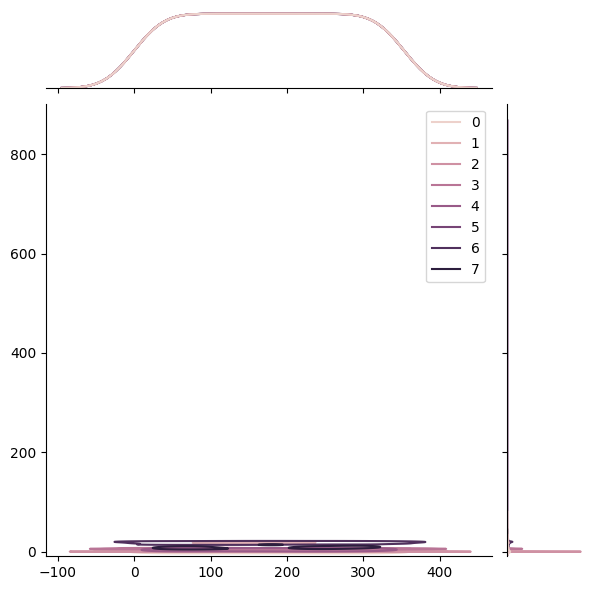

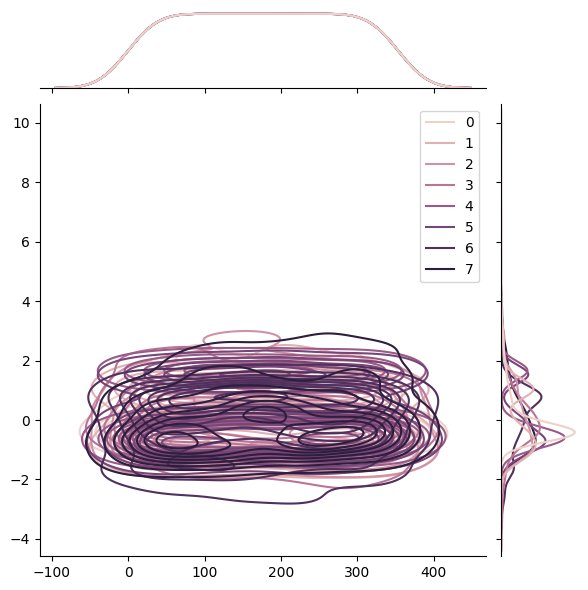

In [26]:
sns.jointplot(data=X_train1, kind="kde",cmap='rainbow')
sns.jointplot(data=X_train2, kind="kde",cmap='rainbow')

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X2=poly.fit_transform(X)

In [28]:

from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3 = train_test_split(X2,y,test_size=0.3,random_state=44,shuffle=True)
sc = StandardScaler()
#scaling the training set
X_train3 = sc.fit_transform(X_train3)
#scaling the test set
X_test3 = sc.transform (X_test3)
LR=LinearRegression()
LR_f=LR.fit(X_train3,y_train3)
y_pred3=LR_f.predict(X_test3)
#y_predlin=LR_f.predict(XX)
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test3, y_pred3,multioutput="uniform_average"))#'raw_values', 'uniform_average', 'variance_weighted'
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test3, y_pred3))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))


Mean Absolute Error: 2.8574843046284935
Mean Squared Error: 17.087673241362776
Root Mean Squared Error: 4.13372389515347


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

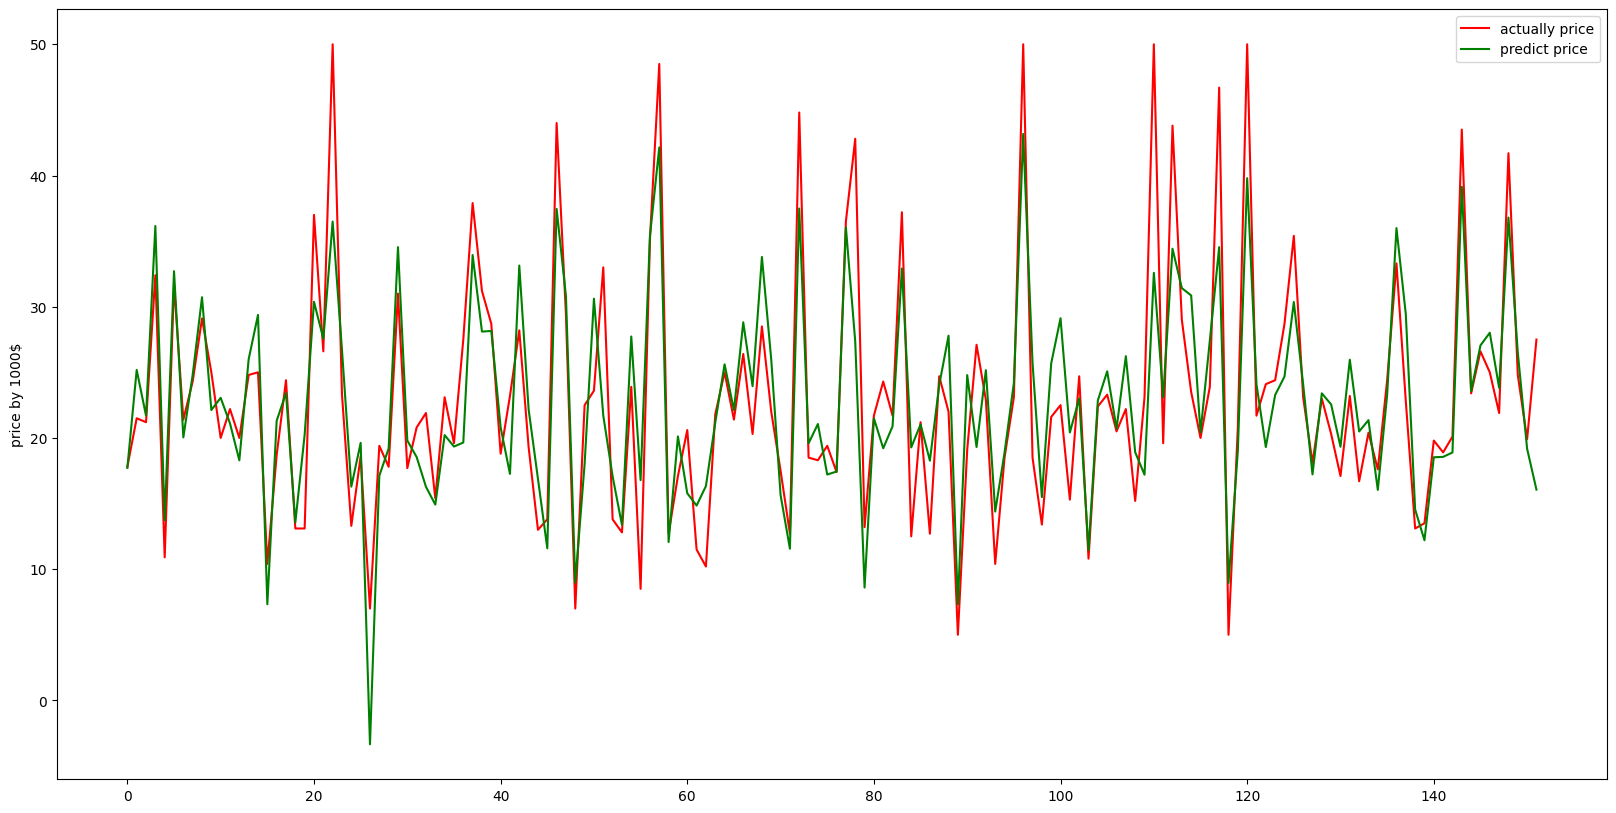

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(np.arange(y_test.size),y_test,color='red')
plt.plot(np.arange(y_test.size),y_pred,color='green')
plt.legend(['actually price','predict price'])
plt.ylabel("price by 1000$")
plt.show()

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

LinearRegression()

Train Score Value :  [1. 1. 1.]
Test Score Value :  [ -41.86874515   -2.58593679 -526.94975362]
Fit Time :  [0.00097823 0.00097966 0.00100183]
Score Time :  [0.00102329 0.         0.        ]
****************************************************************
Mean Absolute Error: 2.6727647350813957
Mean Squared Error: 15.829425204367645
Root Mean Squared Error: 3.978621017936698


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

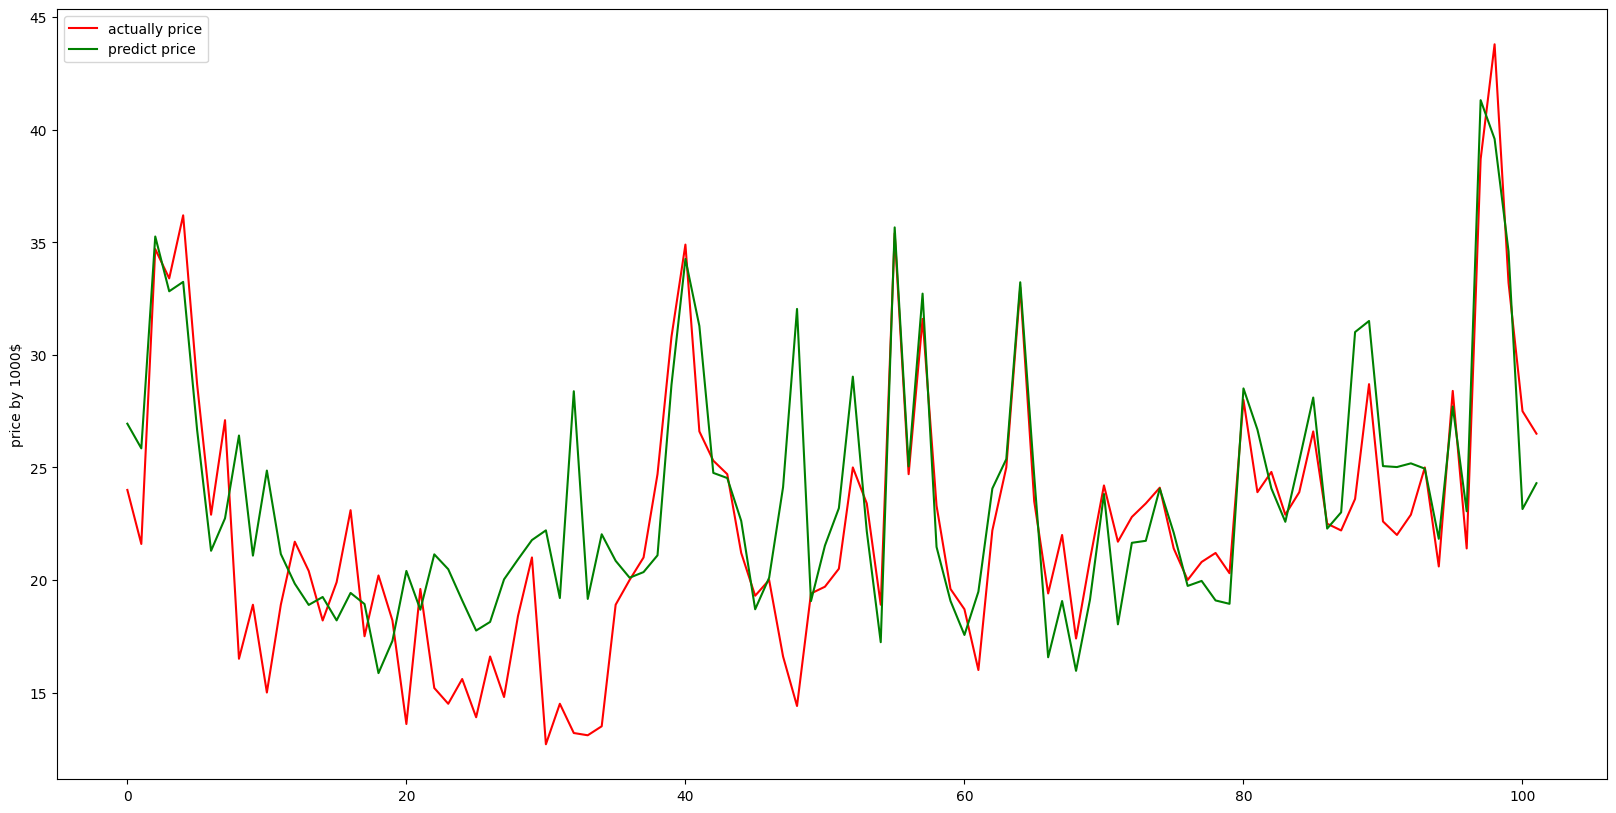

#################################################################################################################


LinearRegression()

Train Score Value :  [1. 1. 1.]
Test Score Value :  [-2.81661477e+01  1.92852227e-01 -3.83807068e+03]
Fit Time :  [0.0010016  0.00100017 0.00100017]
Score Time :  [0. 0. 0.]
****************************************************************
Mean Absolute Error: 13.055235805392417
Mean Squared Error: 453.1394133613166
Root Mean Squared Error: 21.287071507403656


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

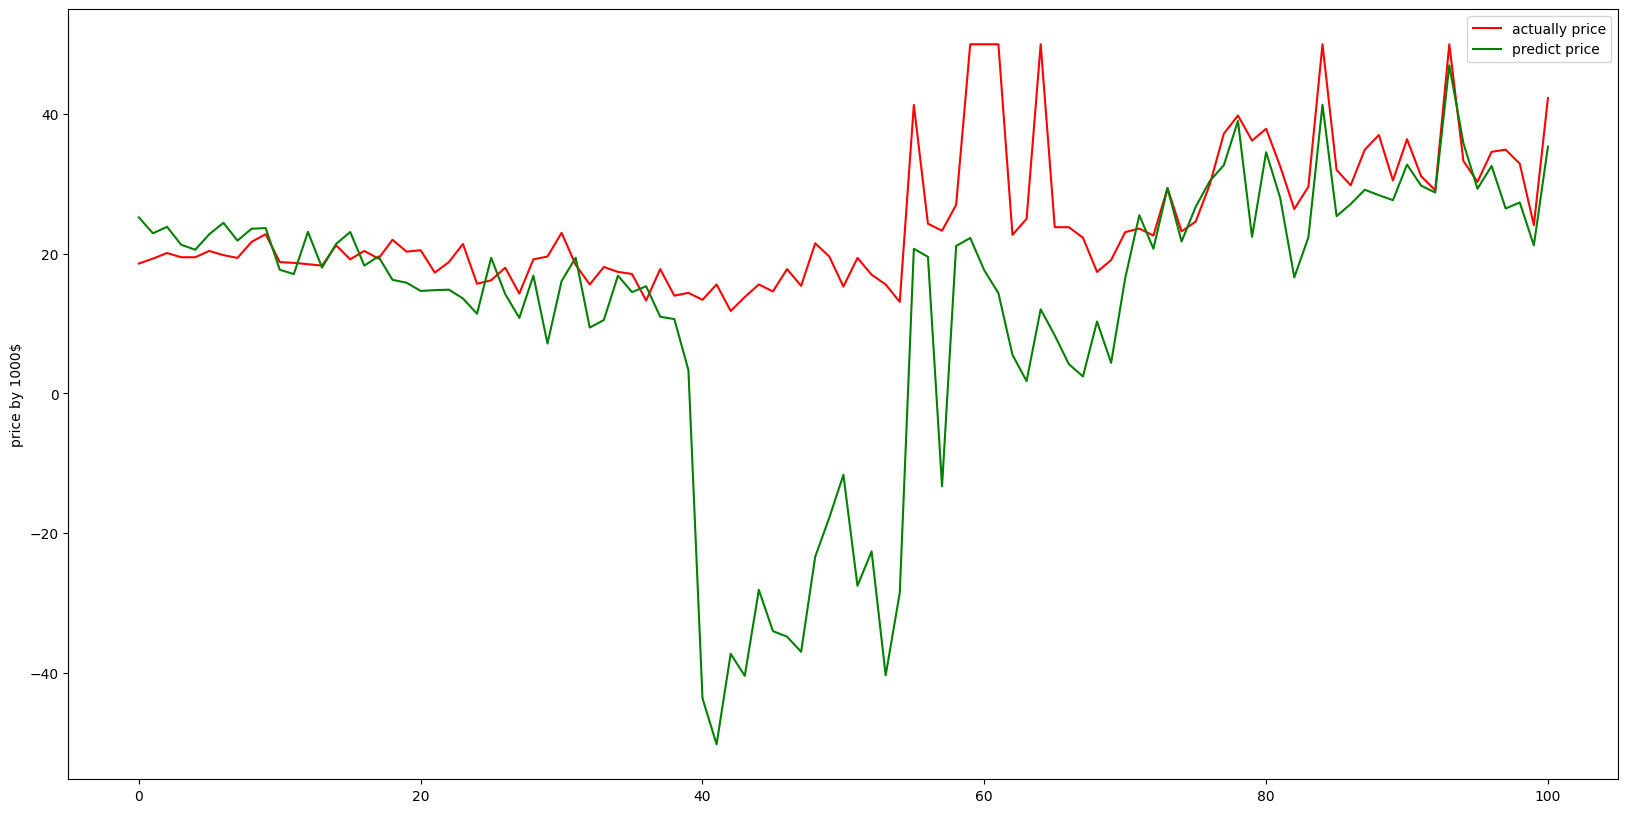

#################################################################################################################


LinearRegression()

Train Score Value :  [1. 1. 1.]
Test Score Value :  [  -5.08584356   -2.01026542 -320.75829902]
Fit Time :  [0.00100732 0.00201964 0.00197768]
Score Time :  [0.00118256 0.         0.00102568]
****************************************************************
Mean Absolute Error: 3.799577762735719
Mean Squared Error: 24.310377534392586
Root Mean Squared Error: 4.930555499575336


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

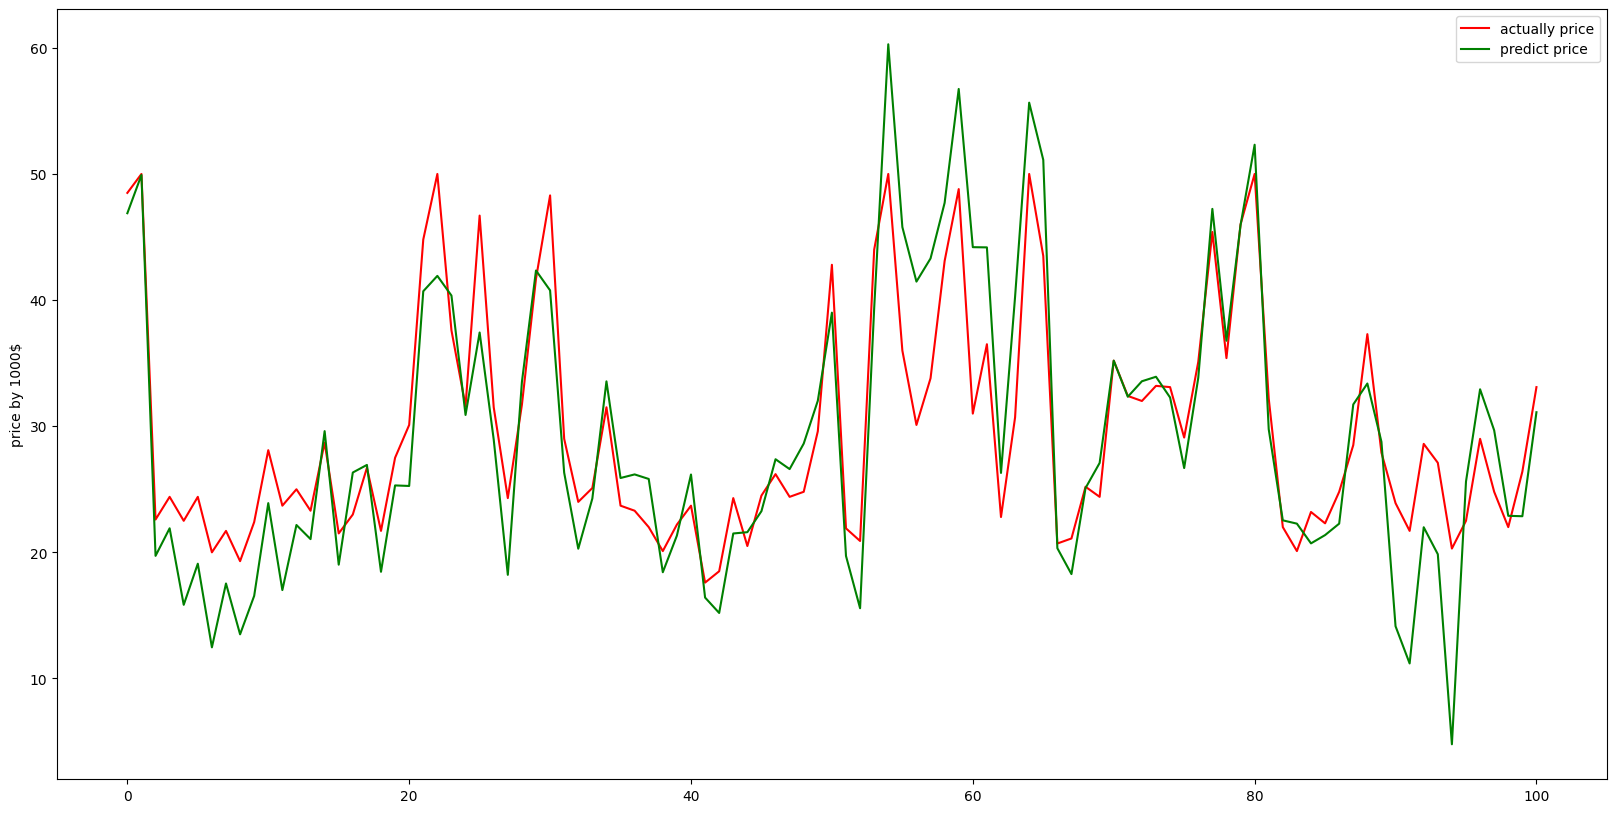

#################################################################################################################


LinearRegression()

Train Score Value :  [1. 1. 1.]
Test Score Value :  [ 4.95198405e-01  1.06086057e-01 -2.22421847e+03]
Fit Time :  [0.00100064 0.0010016  0.00100112]
Score Time :  [0. 0. 0.]
****************************************************************
Mean Absolute Error: 4.458525987928806
Mean Squared Error: 54.45802273561572
Root Mean Squared Error: 7.379567923368937


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

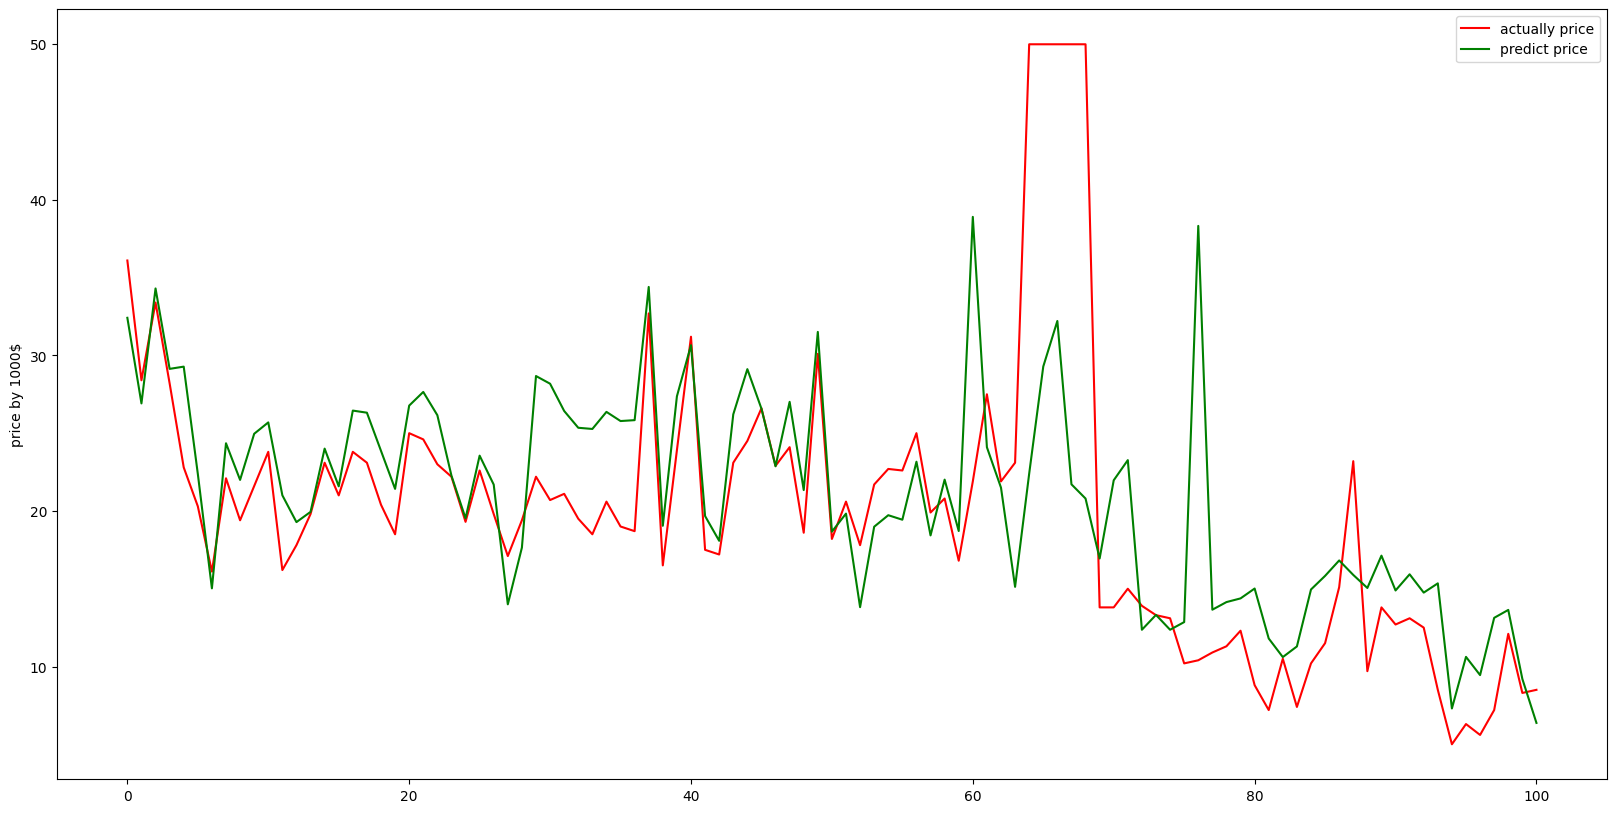

#################################################################################################################


LinearRegression()

Train Score Value :  [1. 1. 1.]
Test Score Value :  [-11.02622848   0.35304059  -0.25748687]
Fit Time :  [0.00143647 0.0010128  0.0009985 ]
Score Time :  [0.00137019 0.00099897 0.        ]
****************************************************************
Mean Absolute Error: 7.864010884393284
Mean Squared Error: 110.0783064375826
Root Mean Squared Error: 10.491820930495459


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

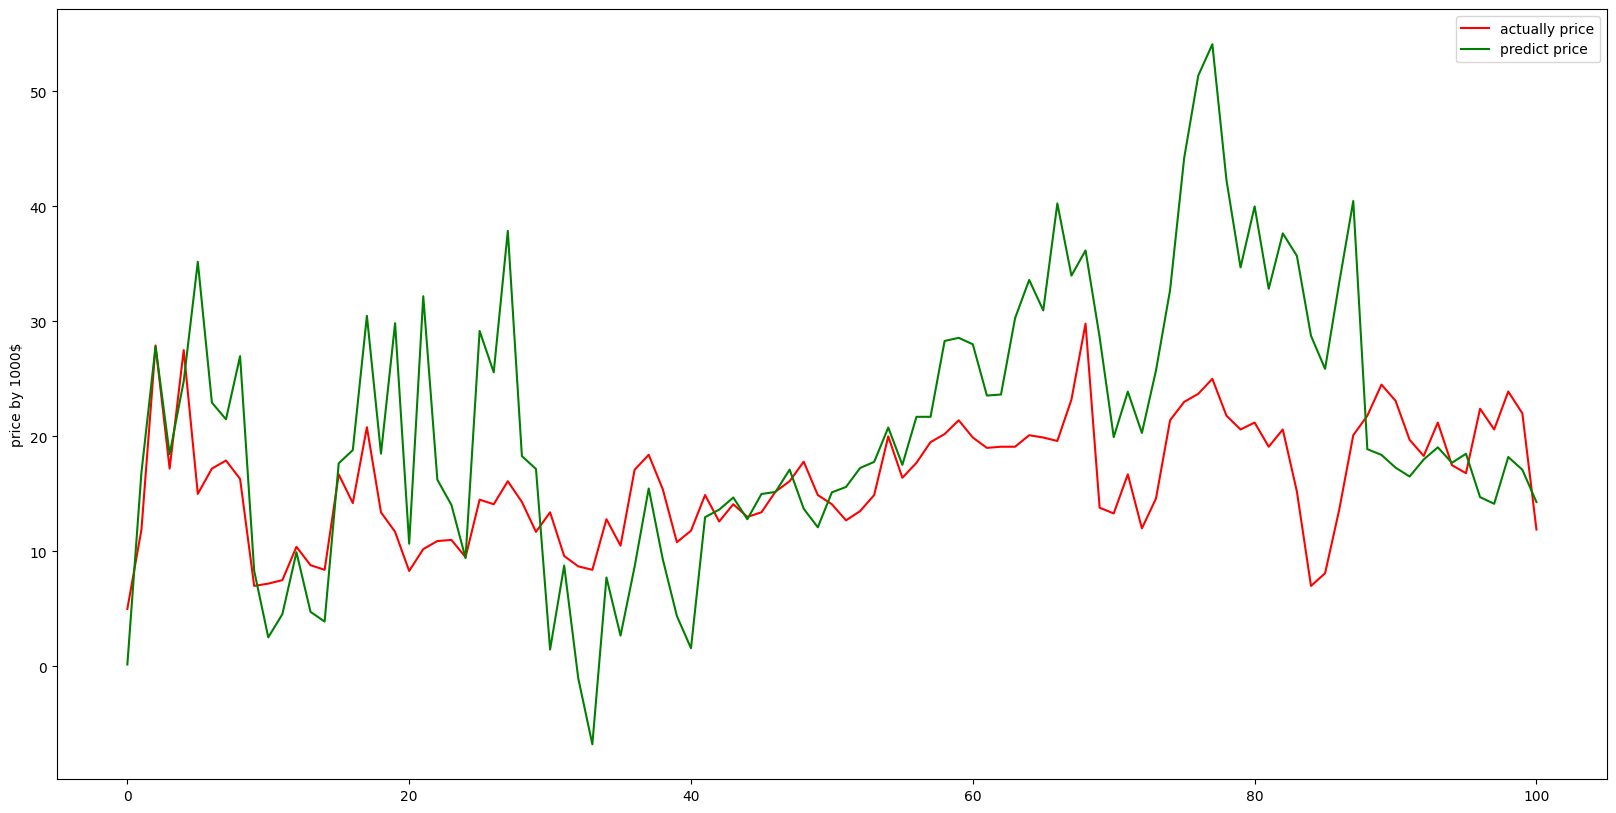

#################################################################################################################


[0.541643672473267,
 -3.977543652833507,
 0.6964511612546019,
 0.37912583498200947,
 -3.1401005988619444]

In [31]:
from sklearn.linear_model import LinearRegression
kf = KFold(n_splits=5)

# Initialize the linear regression model
LR=LinearRegression()

# Initialize a list to store the scores
scores = []
for train_index, test_index in kf.split(X2):
    # Get the training and testing sets
    X_train4, X_test4 = X2[train_index], X2[test_index]
    y_train4, y_test4 = y[train_index], y[test_index]
    X_train4,X_val, y_train4, y_val = train_test_split(X_train4, y_train4, test_size=0.125, random_state=42 ,shuffle=True)
    sc = StandardScaler()
    #scaling the training set
    X_train4 = sc.fit_transform(X_train4)
    #scaling the test set
    X_test4 = sc.transform (X_test4)
    X_val = sc.transform (X_val)
    CrossValidateValues1 = cross_validate(LR,X_val,y_val,cv=3,return_train_score = True)
    # Fit the model on the training set
    LR.fit(X_train4, y_train4)
    # Evaluate the model on the held-out testing set
    score = LR.score(X_test4, y_test4)
    # Add the score to the list
    scores.append(score)
    print('Train Score Value : ', CrossValidateValues1['train_score'])
    print('Test Score Value : ', CrossValidateValues1['test_score'])
    print('Fit Time : ', CrossValidateValues1['fit_time'])
    print('Score Time : ', CrossValidateValues1['score_time'])
    LR_f=LR.fit(X_train4,y_train4)
    y_pred4=LR_f.predict(X_test4)
    print("****************************************************************")
    print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test4, y_pred4,multioutput="uniform_average"))#'raw_values', 'uniform_average', 'variance_weighted'
    print ('Mean Squared Error:' , metrics.mean_squared_error(y_test4, y_pred4))
    print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))
    #sns.boxplot(y_train4)
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(y_test4.size),y_test4,color='red')
    plt.plot(np.arange(y_test4.size),y_pred4,color='green')
    plt.legend(['actually price','predict price'])
    plt.ylabel("price by 1000$")
    plt.show()
    print("#################################################################################################################")
scores

In [32]:
LR_f=LR.fit(X_train3,y_train3)
y_pred3=LR_f.predict(X_test3)
LR_f.coef_
LR.intercept_

array([-1.27737924e-12,  6.46381972e+01, -8.74849366e+00,  2.81113311e+01,
        1.36532372e+01, -1.46131163e+01,  5.89197354e+00,  1.33228580e+01,
       -1.10623651e+01,  2.37596912e-01,  2.30197355e+01, -1.59966313e+01,
        1.40483430e+01,  6.13953908e+01, -8.30003181e+01, -7.01675743e+01,
        5.35408135e+00,  7.20028324e-02,  1.54998306e+01, -3.06954389e+00,
        1.06763326e+01,  3.95322770e+00,  7.30571312e-01, -7.25852243e+00,
       -1.25777122e+01, -9.59144434e+00,  2.29476860e+01, -2.97053865e+01,
       -5.41560771e+00,  3.49491115e+00,  6.19269568e+00, -7.65240168e+00,
       -1.12310918e+01, -8.80052939e+00, -8.64729532e-01, -4.04719912e+01,
        3.50575123e+01,  9.59075251e+00, -7.27018918e+00,  4.39236683e+00,
        1.82484736e+01, -6.46894388e+00, -8.60409114e+00,  7.78702617e+00,
        8.50383039e+00])

22.304802259887122

In [33]:
print("predict")
X_test3[4,:] @ LR_f.coef_ + LR_f.intercept_
print("actually")
y_test3.iloc[4]
print("predict")
X_test3[5,:] @ LR_f.coef_ + LR_f.intercept_
print("actually")
y_test3.iloc[5]
print("predict")
X_test3[150,:] @ LR_f.coef_ + LR_f.intercept_
print("actually")
y_test3.iloc[150]

predict


12.980251157943297

actually


10.9

predict


34.702208995211734

actually


31.7

predict


18.4587673990514

actually


19.9

In [34]:
prdD=pd.DataFrame({"prd":(np.matrix(X_test3) * np.matrix(LR.coef_).T+LR.intercept_).tolist(),"act": y_test3})
prdD

prd   act
316  [18.983991202116794]  17.8
218  [20.230775609315092]  21.5
485  [27.071713189741953]  21.2
274  [31.830437301854708]  32.4
427  [12.980251157943197]  10.9
..                    ...   ...
254  [20.919293130826382]  21.9
232   [45.48304210575553]  41.7
289    [24.2667261560849]  24.8
15   [18.458767399051393]  19.9
365   [49.27047760790309]  27.5

[152 rows x 2 columns]

<h1>Random ForstR</h1>
<h1></h1>

Mean Absolute Error: 2.510936842105264
Mean Squared Error: 10.866346330000034
Root Mean Squared Error: 3.2964141623891914


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

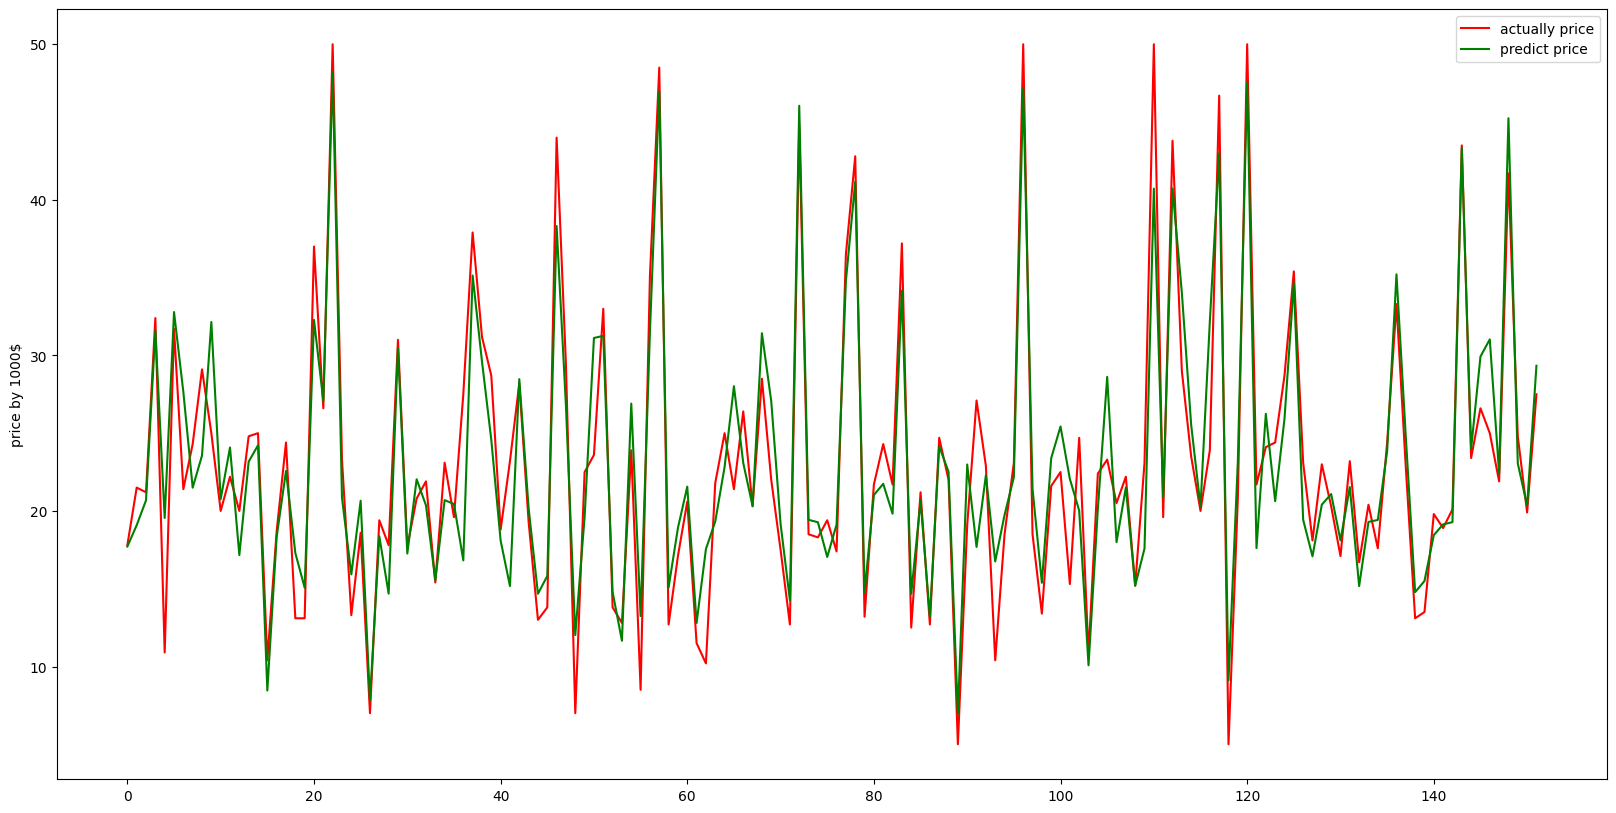

In [35]:
X_train5,X_test5,y_train5,y_test5 = train_test_split(X2,y,test_size=0.3,random_state=44,shuffle=True)
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(X_train5, y_train5)
y_pred5 = regressor.predict(X_test5)
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test5, y_pred5))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test5, y_pred5))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test5, y_pred5)))
plt.figure(figsize=(20,10))
plt.plot(np.arange(y_test5.size),y_test5,color='red')
plt.plot(np.arange(y_test5.size),y_pred5,color='green')
plt.legend(['actually price','predict price'])
plt.ylabel("price by 1000$")
plt.show()


Mean Absolute Error: 2.287688207861425
Mean Squared Error: 9.770166761399581
Root Mean Squared Error: 3.125726597352939


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

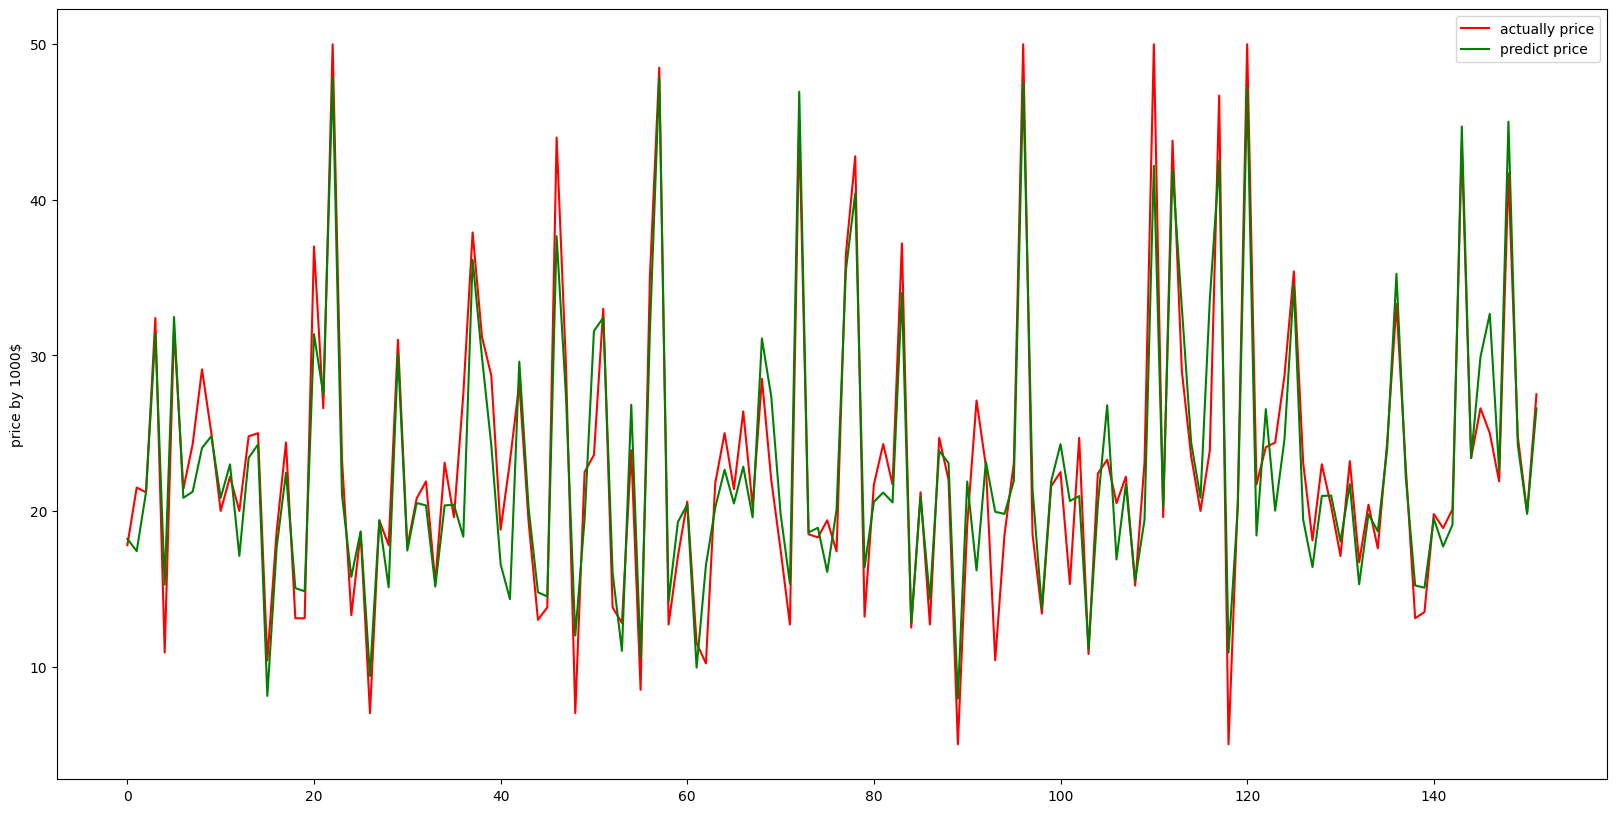

In [36]:
X=df.loc[:,[False, False,  False, False,  True,  True,  True,  True, False,True,  True, True,  True,False]].values
X_train6,X_test6,y_train6,y_test6 = train_test_split(X,y,test_size=0.3,random_state=44,shuffle=True)
sc = StandardScaler()
#scaling the training set
X_train6 = sc.fit_transform(X_train6)
#scaling the test set
X_test6 = sc.transform (X_test6)
rf_reg = RandomForestRegressor(random_state=42, n_estimators=790)
regressor = rf_reg.fit(X_train6, y_train6)
y_pred6 = regressor.predict(X_test6)
print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test6, y_pred6))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test6, y_pred6))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test6, y_pred6)))
plt.figure(figsize=(20,10))
plt.plot(np.arange(y_test6.size),y_test6,color='red')
plt.plot(np.arange(y_test5.size),y_pred6,color='green')
plt.legend(['actually price','predict price'])
plt.ylabel("price by 1000$")
plt.show()

RandomForestRegressor(n_estimators=790, random_state=42)

Train Score Value :  [0.97071974 0.95962734 0.95682921]
Test Score Value :  [0.6971965  0.65721527 0.73473333]
Fit Time :  [0.78596306 0.80521894 0.78343487]
Score Time :  [0.04550362 0.04337597 0.0435183 ]
**************************************************
Mean Absolute Error: 2.160068255150165
Mean Squared Error: 7.859466069257342
Root Mean Squared Error: 2.803473928763623


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

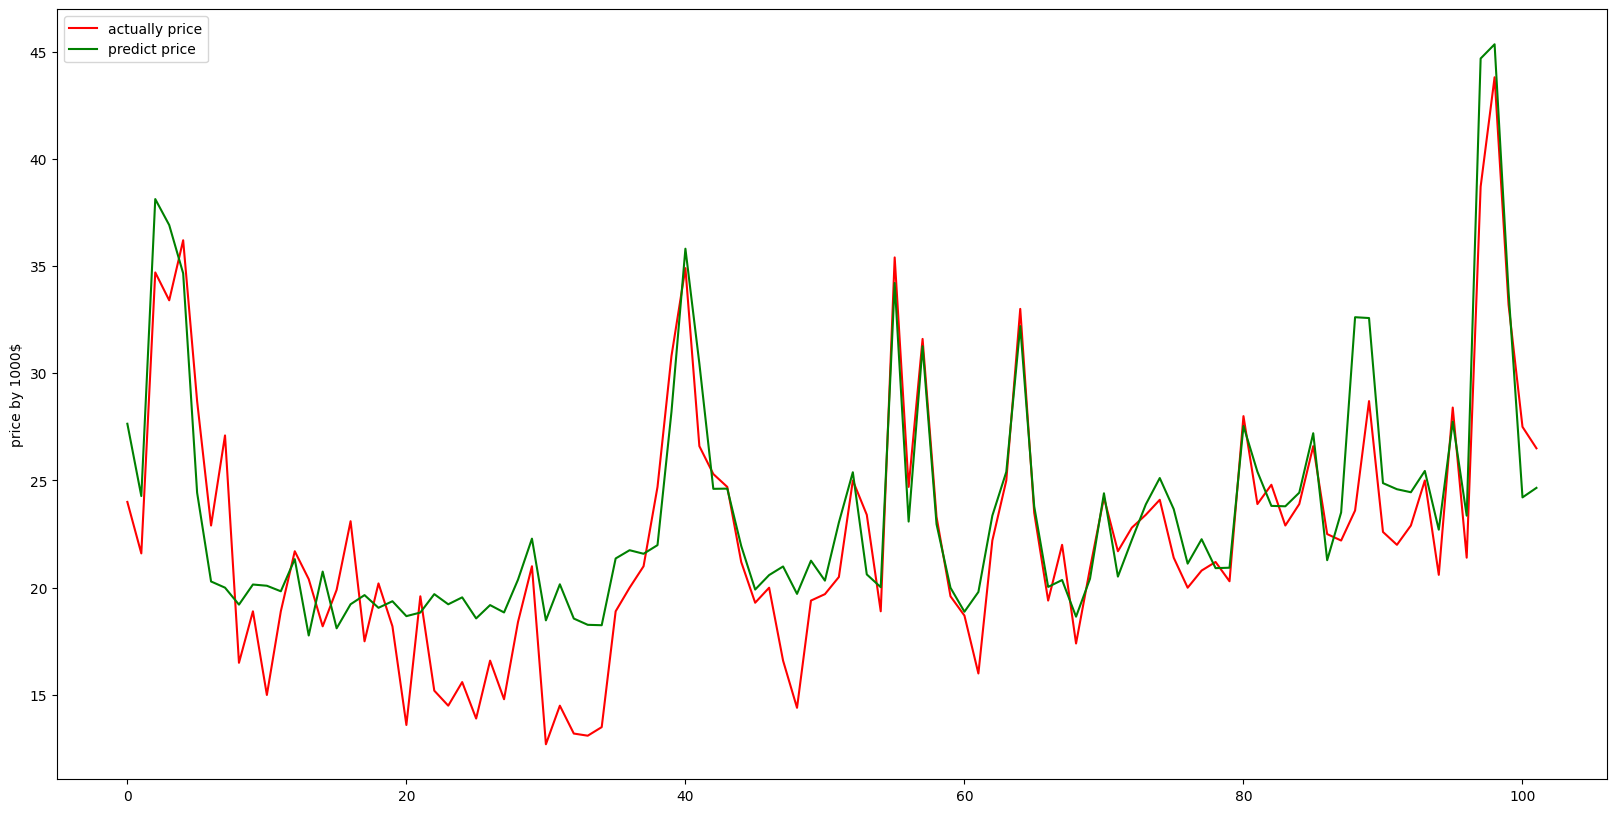

################################################################################


RandomForestRegressor(n_estimators=790, random_state=42)

Train Score Value :  [0.97046571 0.96867543 0.96256657]
Test Score Value :  [0.8270218  0.64637789 0.81282331]
Fit Time :  [0.80436182 0.81297135 1.07870126]
Score Time :  [0.04100204 0.04111171 0.0446465 ]
**************************************************
Mean Absolute Error: 2.701948865772642
Mean Squared Error: 13.027469555843556
Root Mean Squared Error: 3.609358607265778


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

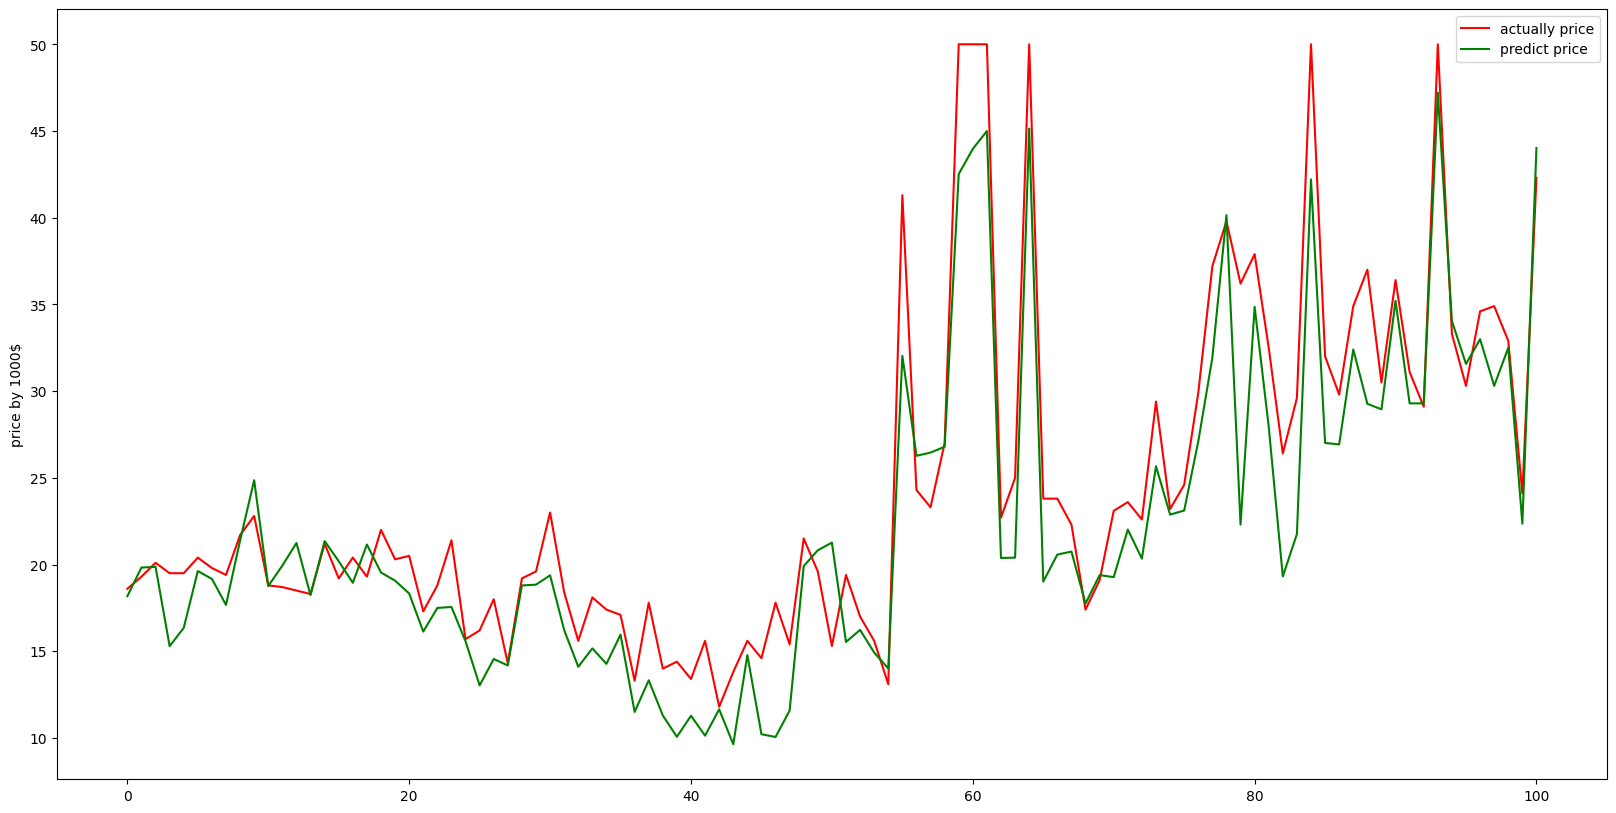

################################################################################


RandomForestRegressor(n_estimators=790, random_state=42)

Train Score Value :  [0.93799069 0.96256085 0.92476165]
Test Score Value :  [0.5279846  0.26684438 0.75331489]
Fit Time :  [0.7741971  0.82534623 0.78564644]
Score Time :  [0.04359961 0.04557872 0.04098821]
**************************************************
Mean Absolute Error: 3.240433638300548
Mean Squared Error: 19.617265412848013
Root Mean Squared Error: 4.4291382246265485


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

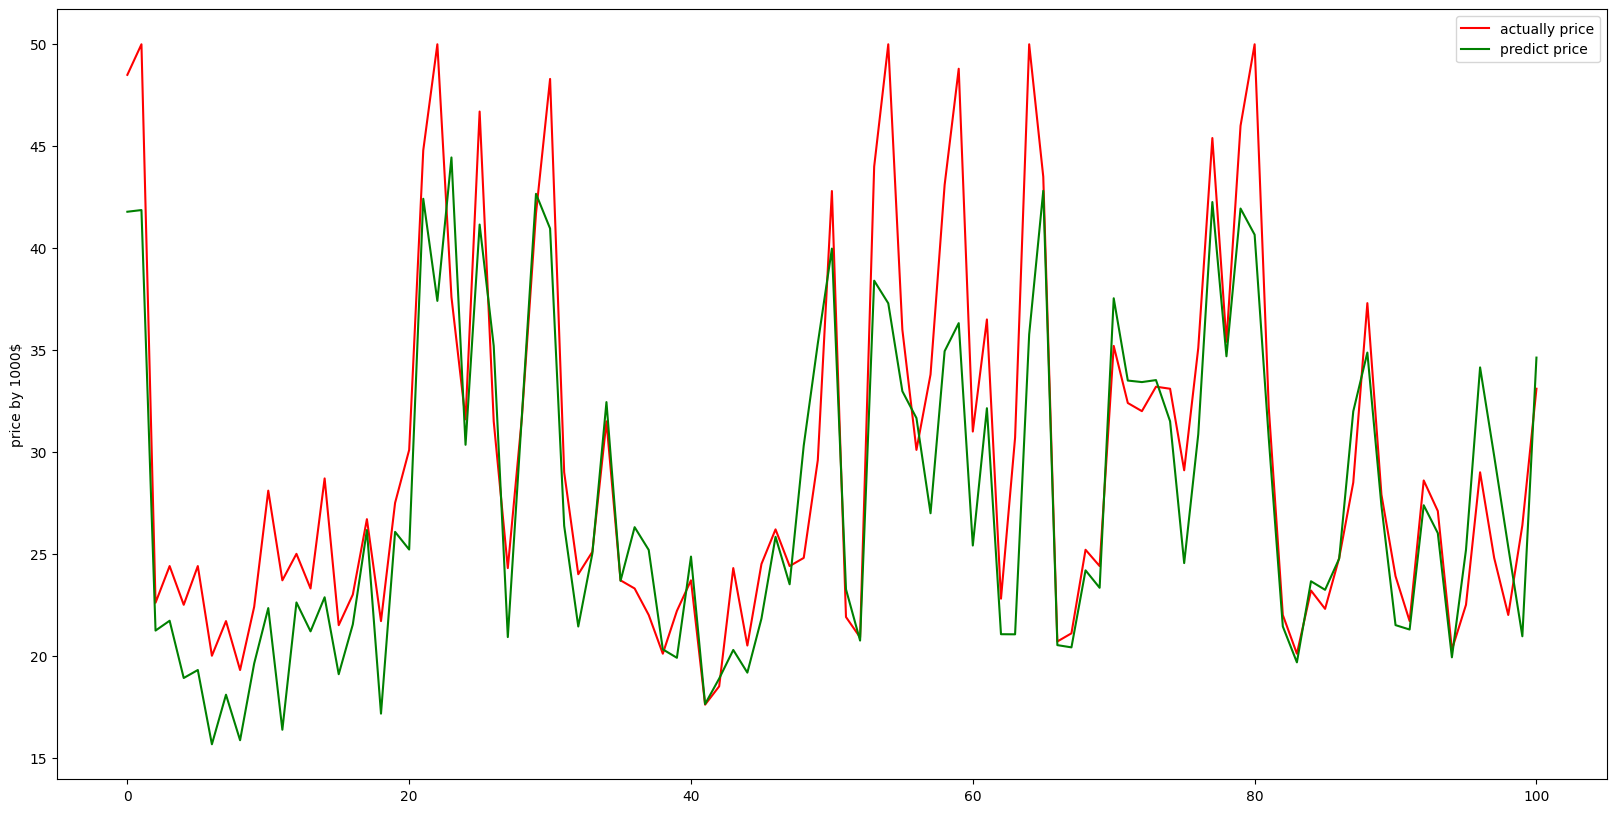

################################################################################


RandomForestRegressor(n_estimators=790, random_state=42)

Train Score Value :  [0.97215378 0.93339271 0.9795344 ]
Test Score Value :  [0.86734002 0.83329608 0.70417251]
Fit Time :  [0.82693338 0.83199716 0.83506441]
Score Time :  [0.04502821 0.04413652 0.04612184]
**************************************************
Mean Absolute Error: 4.0785687429502495
Mean Squared Error: 50.42291317905716
Root Mean Squared Error: 7.1009093205769895


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

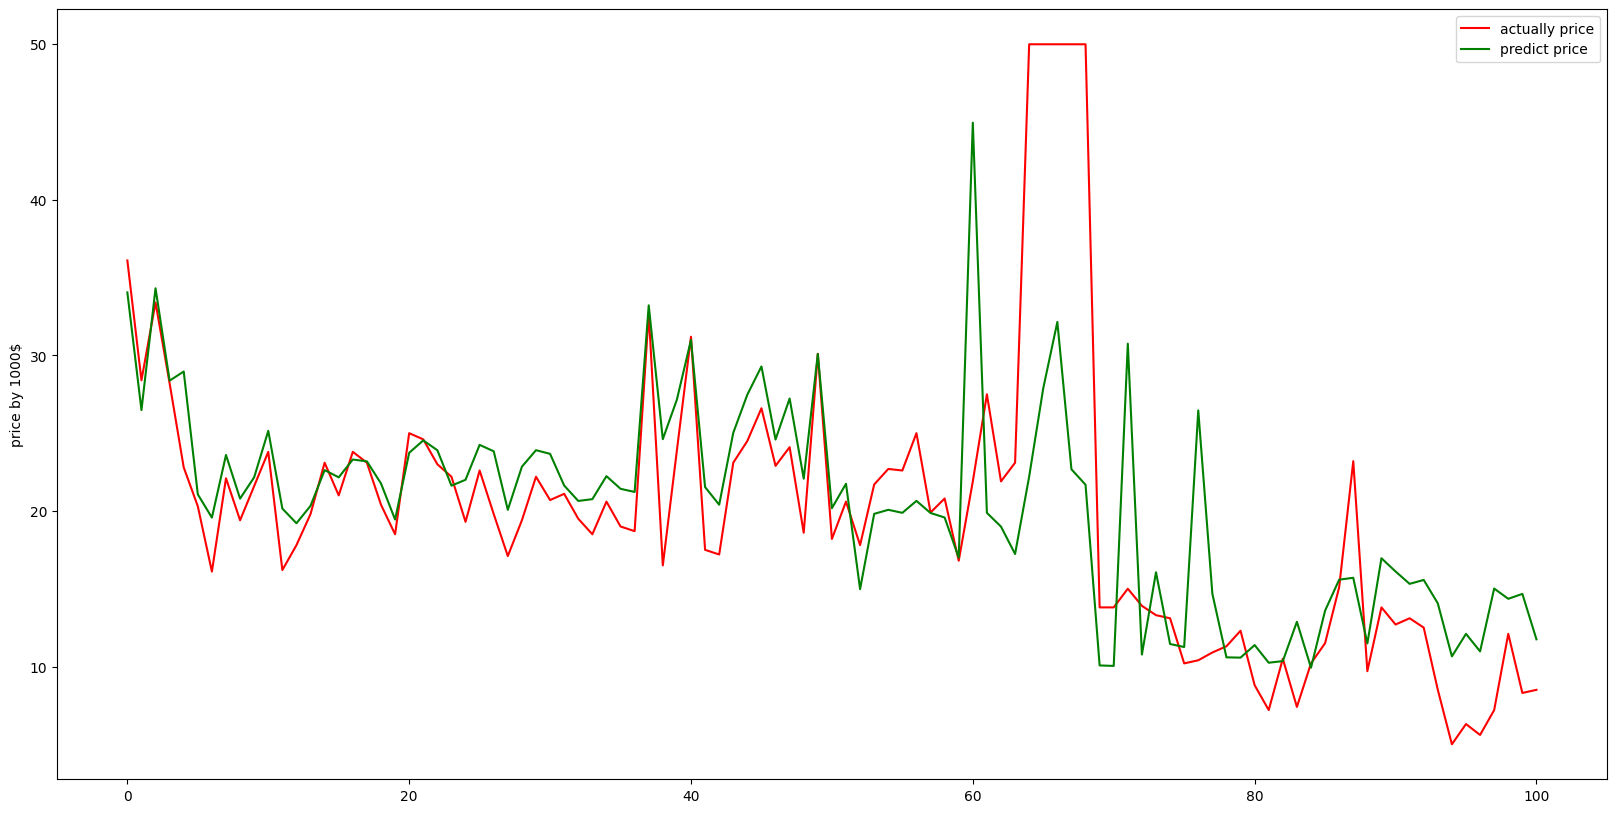

################################################################################


RandomForestRegressor(n_estimators=790, random_state=42)

Train Score Value :  [0.95227717 0.9444226  0.96834385]
Test Score Value :  [0.69892333 0.83995306 0.771099  ]
Fit Time :  [0.81341958 0.84384418 0.83948135]
Score Time :  [0.04326487 0.04426503 0.04768252]
**************************************************
Mean Absolute Error: 3.4780323348790474
Mean Squared Error: 18.555224152641067
Root Mean Squared Error: 4.307577527177087


<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'price by 1000$')

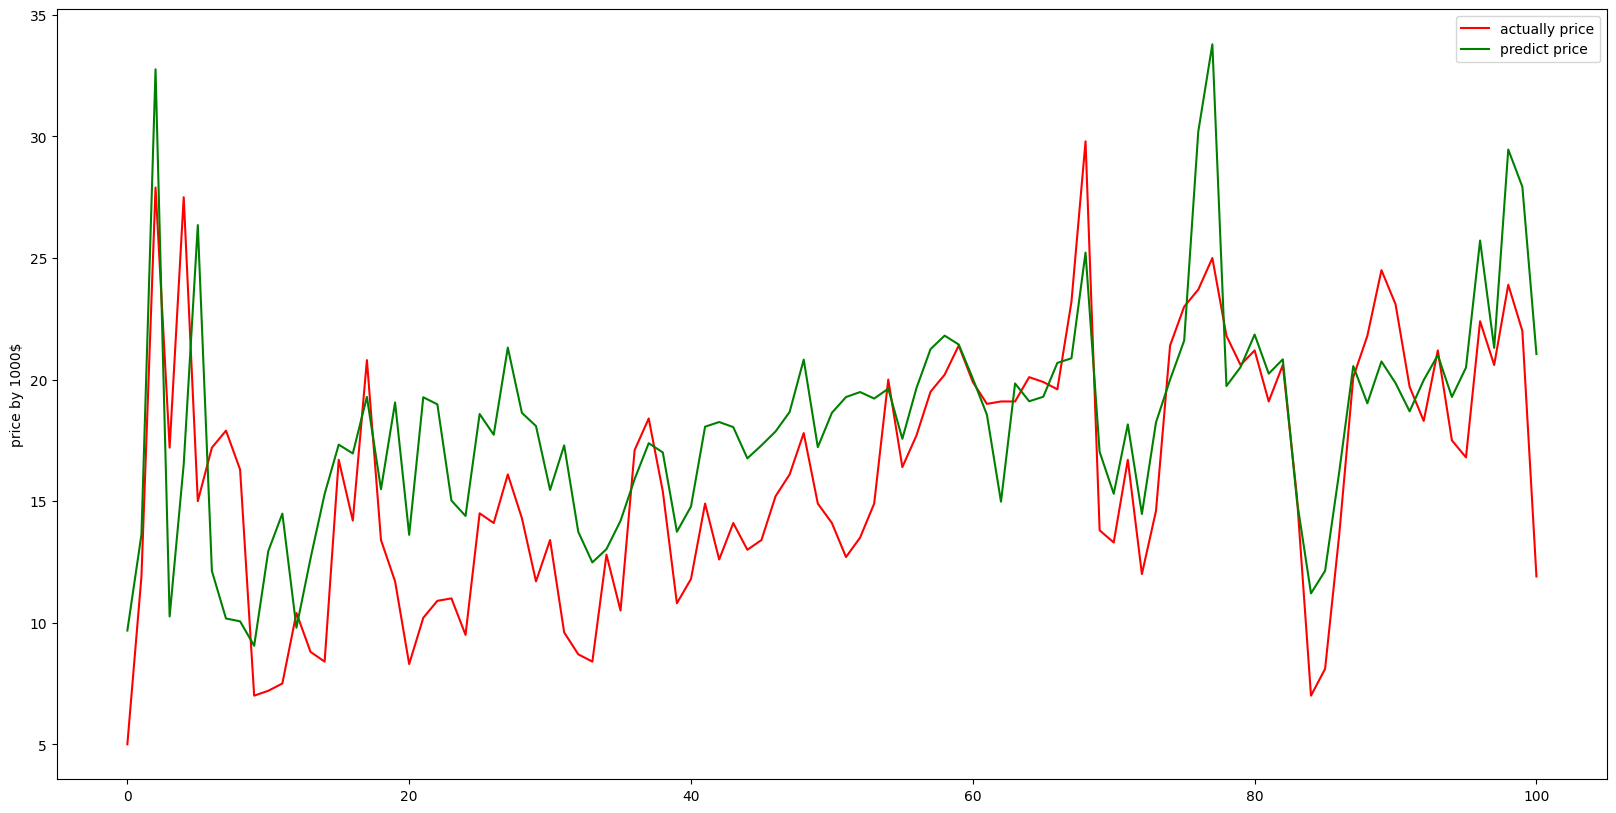

################################################################################


[0.7724215530686622,
 0.8568987898908145,
 0.7550511863912499,
 0.425129989206396,
 0.3021286653794387]

In [37]:
scores = []
rf_reg = RandomForestRegressor(random_state=42, n_estimators=790)
kf2 = KFold(n_splits=5)
for train_index, test_index in kf2.split(X):
    # Get the training and testing sets
    X_train7, X_test7 = X[train_index], X[test_index]
    y_train7, y_test7 = y[train_index], y[test_index]
    X_train7,X_val, y_train7, y_val = train_test_split(X_train7, y_train7, test_size=0.125, random_state=42)
    sc = StandardScaler()
    #scaling the training set
    X_train7 = sc.fit_transform(X_train7)
    #scaling the test set
    X_test7 = sc.transform (X_test7)
    X_val = sc.transform (X_val)
    CrossValidateValues1 = cross_validate(rf_reg,X_val,y_val,cv=3,return_train_score = True)
    # Fit the model on the training set
    rf_reg.fit(X_train7, y_train7)

    # Evaluate the model on the held-out testing set
    score = rf_reg.score(X_test7, y_test7)

    # Add the score to the list
    scores.append(score)
    print('Train Score Value : ', CrossValidateValues1['train_score'])
    print('Test Score Value : ', CrossValidateValues1['test_score'])
    print('Fit Time : ', CrossValidateValues1['fit_time'])
    print('Score Time : ', CrossValidateValues1['score_time'])
    print("**************************************************")
    rf_reg = RandomForestRegressor(random_state=42, n_estimators=790)
    regressor = rf_reg.fit(X_train7, y_train7)
    y_pred7 = regressor.predict(X_test7)
    print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test7, y_pred7))
    print ('Mean Squared Error:' , metrics.mean_squared_error(y_test7, y_pred7))
    print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test7, y_pred7)))
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(y_test7.size),y_test7,color='red')
    plt.plot(np.arange(y_test7.size),y_pred7,color='green')
    plt.legend(['actually price','predict price'])
    plt.ylabel("price by 1000$")
    plt.show()
    print("################################################################################")
scores

<h1>Neural NetWork</h1>

In [38]:
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [39]:
X_train8, X_test8, y_train8, y_test8 = train_test_split(df.iloc[:,:-1], y, test_size=0.20, random_state=42)
sc = StandardScaler()
X_train8 = sc.fit_transform(X_train8)
X_test8 = sc.transform(X_test8)

In [40]:
def create_model(learning_rate, dropout_rate):
    #create sequential model
    model = Sequential()
    #adding dense layers
    model.add(Dense(12, input_dim=X_train8.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    #compiling the model
    adam = Adam(lr=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error', 'mean_absolute_error'])
    return model

In [41]:
X_train8.shape

(404, 13)

In [42]:
#the default dropout rate 
dropout_rate = 0.1
#The number of epochs refers to the number of times the whole dataset is used for training 
epochs = 2000
#the batch size refers to the number of records, after which the weights are updated 
batch_size = 13
#the learning rate
learn_rate = 0.0005
model = create_model(learn_rate, dropout_rate)

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, 
show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [44]:
model_history = model.fit(X_train8, y_train8, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=2)

Epoch 1/2000
25/25 - 1s - loss: 654.9971 - mean_squared_error: 654.9971 - mean_absolute_error: 23.6729 - val_loss: 582.1228 - val_mean_squared_error: 582.1228 - val_mean_absolute_error: 22.5964 - 1s/epoch - 48ms/step
Epoch 2/2000
25/25 - 0s - loss: 637.5186 - mean_squared_error: 637.5186 - mean_absolute_error: 23.3513 - val_loss: 571.8547 - val_mean_squared_error: 571.8547 - val_mean_absolute_error: 22.3806 - 73ms/epoch - 3ms/step
Epoch 3/2000
25/25 - 0s - loss: 629.5187 - mean_squared_error: 629.5187 - mean_absolute_error: 23.1766 - val_loss: 563.9351 - val_mean_squared_error: 563.9351 - val_mean_absolute_error: 22.2164 - 71ms/epoch - 3ms/step
Epoch 4/2000
25/25 - 0s - loss: 621.8209 - mean_squared_error: 621.8209 - mean_absolute_error: 23.0265 - val_loss: 557.1862 - val_mean_squared_error: 557.1862 - val_mean_absolute_error: 22.0767 - 69ms/epoch - 3ms/step
Epoch 5/2000
25/25 - 0s - loss: 614.3356 - mean_squared_error: 614.3356 - mean_absolute_error: 22.8803 - val_loss: 551.2734 - val

<h1>clustering</h1>

<h3>Dimensional reduction</h3>

In [48]:
from sklearn.decomposition import PCA


X_train9,X_test9,y_train9,y_test9=train_test_split(df,df.iloc[:,-1],test_size=0.3,random_state=44)
pca=PCA()
X_train9=pca.fit_transform(X_train9)
X_test9=pca.transform(X_test9)
pca.explained_variance_ratio_

array([8.07482316e-01, 1.60953091e-01, 2.09512854e-02, 6.68118097e-03,
       1.96786580e-03, 8.31837329e-04, 4.42458399e-04, 3.49748743e-04,
       2.35855959e-04, 7.05555535e-05, 2.66815364e-05, 5.50761304e-06,
       1.54546496e-06, 7.05560745e-08])

In [49]:
PCAModel = PCA(n_components=3, svd_solver='auto')#it can be full,arpack,randomized
PCAModel.fit(df.iloc[:,:-1])
newX=PCAModel.transform(df.iloc[:,:-1])



PCA(n_components=3)

In [50]:
from sklearn.mixture import GaussianMixture
scores=[]
GM=GaussianMixture(n_components=3)
kf4 = KFold(n_splits=5)
for train_index, test_index in kf4.split(newX):
    # Get the training and testing sets
    X_train, X_test = newX[train_index], newX[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
    sc = StandardScaler()
    #scaling the training set
    X_train = sc.fit_transform(X_train)
    #scaling the test set
    X_test = sc.transform (X_test)
    X_val = sc.transform (X_val)
    CrossValidateValues1 = cross_validate(GM,X_val,y_val,cv=3,return_train_score = True)
    # Fit the model on the training set
    GM.fit(X_train, y_train)

    # Evaluate the model on the held-out testing set
    score = GM.score(X_test, y_test)

    # Add the score to the list
    scores.append(score)
    print('Train Score Value : ', CrossValidateValues1['train_score'])
    print('Test Score Value : ', CrossValidateValues1['test_score'])
    print('Fit Time : ', CrossValidateValues1['fit_time'])
    print('Score Time : ', CrossValidateValues1['score_time'])
classfir=GM.fit(newX)
GMPr=classfir.predict(newX)
scores

GaussianMixture(n_components=3)

Train Score Value :  [-1.75749311 -0.4100605  -1.83028489]
Test Score Value :  [ -5.93287346 -27.68831032  -5.39559909]
Fit Time :  [0.01553154 0.01300001 0.01100755]
Score Time :  [0.         0.0010016  0.00099969]


GaussianMixture(n_components=3)

Train Score Value :  [-0.67101467 -0.48274061 -1.33502912]
Test Score Value :  [-3.59872163 -1.90323953 -3.57635146]
Fit Time :  [0.01199985 0.01400042 0.01499963]
Score Time :  [0.         0.00100231 0.        ]


GaussianMixture(n_components=3)

Train Score Value :  [-1.46338143 -2.79985853 -2.07610153]
Test Score Value :  [-3.22004308 -3.30808602 -5.98428066]
Fit Time :  [0.00999808 0.01599693 0.01306939]
Score Time :  [0.00099874 0.         0.        ]


GaussianMixture(n_components=3)

Train Score Value :  [-2.13061028 -2.10584546 -1.1728728 ]
Test Score Value :  [ -5.04477887  -2.0913577  -27.18052741]
Fit Time :  [0.01152682 0.01499653 0.02999854]
Score Time :  [0.         0.         0.00106812]


GaussianMixture(n_components=3)

Train Score Value :  [-2.10548334 -1.57211843 -1.55366001]
Test Score Value :  [-12.38172893  -1.8521327  -20.14156289]
Fit Time :  [0.01051569 0.01519012 0.01634765]
Score Time :  [0.         0.00107718 0.        ]


[-1.8957070561744518,
 -4.708545153446157,
 -2.0654796048467023,
 -1.5427576077789091,
 -10.959836310235517]

Text(0.5, 0, 'X axis')

Text(0.5, 0.5, 'Y axis')

Text(0.5, 0, 'Z axis')

[Text(-300.0, 0, ''),
 Text(-200.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(0.0, 0, ''),
 Text(100.0, 0, ''),
 Text(200.0, 0, ''),
 Text(300.0, 0, ''),
 Text(400.0, 0, '')]

[Text(-150.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, ''),
 Text(300.0, 0, ''),
 Text(350.0, 0, '')]

[Text(-60.0, 0, ''),
 Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, ''),
 Text(120.0, 0, '')]

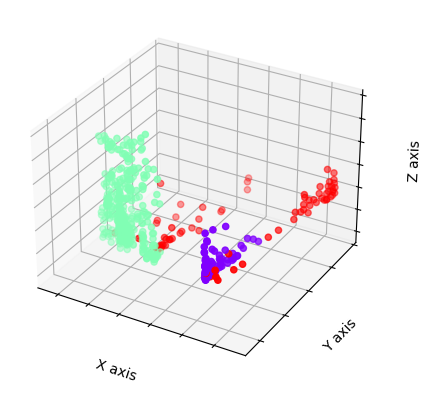

In [51]:
x = newX[:,0]
y = newX[:,1]
z=newX[:,2]

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs =x
ys = y
zs = z
ax.scatter(xs, ys, zs,c=GMPr,cmap='rainbow', marker="o")

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

c:\Users\abd50\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1188: UserWarning: The following kwargs were not used by contour: 'z', 'how'
  **contour_kws,


Text(0.5, 0.98, 'Jointplot with 3D scatter plot')

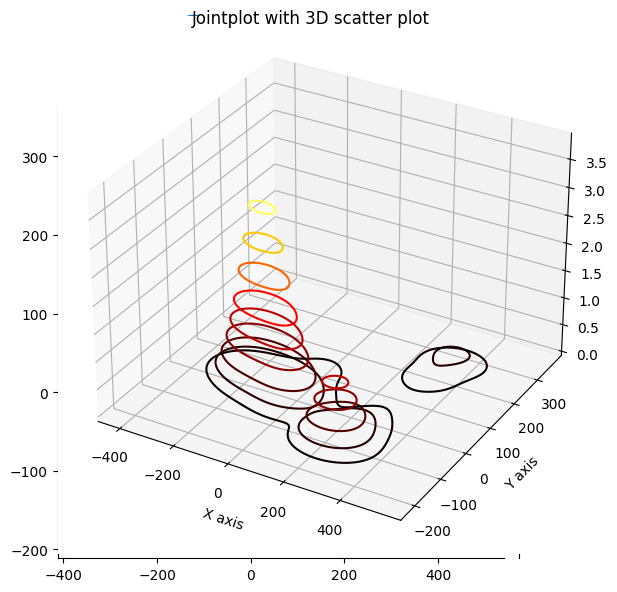

In [82]:
g = sns.jointplot(x=x, y=y,kind='kde')
g.ax_joint = g.fig.add_subplot( projection='3d')

# Create the scatter plot
g.plot_joint(sns.kdeplot, z=z,how=GMPr,cmap='hot')

# Set the axis labels and title
g.set_axis_labels('X axis', 'Y axis')
g.fig.suptitle('Jointplot with 3D scatter plot')

# Show the plot
plt.show()





In [60]:
GMPr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [52]:
from sklearn.cluster import AgglomerativeClustering

AG=AgglomerativeClustering(n_clusters=3)
classfir2=AG.fit(newX)



Text(0.5, 0, 'X axis')

Text(0.5, 0.5, 'Y axis')

Text(0.5, 0, 'Z axis')

[Text(-300.0, 0, ''),
 Text(-200.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(0.0, 0, ''),
 Text(100.0, 0, ''),
 Text(200.0, 0, ''),
 Text(300.0, 0, ''),
 Text(400.0, 0, '')]

[Text(-150.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, ''),
 Text(300.0, 0, ''),
 Text(350.0, 0, '')]

[Text(-60.0, 0, ''),
 Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, ''),
 Text(120.0, 0, '')]

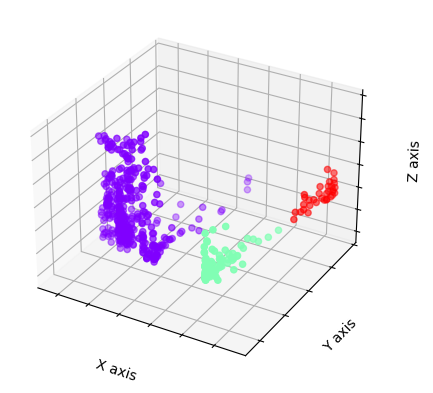

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs =x
ys = y
zs = z
ax.scatter(xs, ys, zs,c=classfir2.labels_,cmap='rainbow')


ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [54]:
from sklearn.cluster import KMeans

KM=KMeans(n_clusters=3)
classfir3=KM.fit(newX)
#classfir3.labels_
#classfir3.cluster_centers_


Text(0.5, 0, 'X axis')

Text(0.5, 0.5, 'Y axis')

Text(0.5, 0, 'Z axis')

[Text(-300.0, 0, ''),
 Text(-200.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(0.0, 0, ''),
 Text(100.0, 0, ''),
 Text(200.0, 0, ''),
 Text(300.0, 0, ''),
 Text(400.0, 0, '')]

[Text(-150.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, ''),
 Text(300.0, 0, ''),
 Text(350.0, 0, '')]

[Text(-60.0, 0, ''),
 Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, ''),
 Text(120.0, 0, '')]

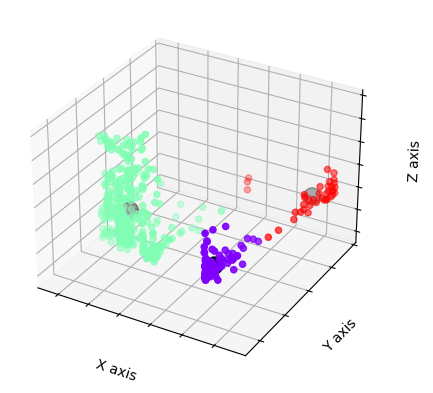

In [55]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs =x
ys = y
zs = z
ax.scatter(classfir3.cluster_centers_[:, 0],classfir3.cluster_centers_[:, 1], classfir3.cluster_centers_[:, 2],s=150,c='black')
ax.scatter(xs, ys, zs,c=classfir3.labels_,cmap='rainbow')


ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


In [56]:
from sklearn.neighbors import NearestNeighbors
NNi=NearestNeighbors(n_neighbors=5)
NNi.fit(newX)
NNi.kneighbors()

NearestNeighbors()

(array([[ 3.99557064,  8.32663715,  8.39257871,  8.39920465,  8.56204714],
        [11.39051115, 14.5837446 , 15.20956025, 16.79989071, 17.77366228],
        [ 6.2560804 ,  6.26862689,  9.79219919, 11.55287345, 11.71912661],
        ...,
        [ 3.66613204,  4.67545951,  4.78052399,  4.86615158,  5.47689849],
        [ 3.66613204,  4.30538215,  4.32727491,  4.67072026,  5.17238347],
        [ 2.99495396,  4.39273505,  5.62348512,  6.35640335,  7.2106028 ]]),
 array([[176, 296, 311, 294, 241],
        [ 47,   2,  49,  48,  87],
        [ 85,  87,  49,  84,  51],
        ...,
        [504, 211, 218, 219,  88],
        [503, 217, 219, 211, 210],
        [502,  88,  97, 217, 504]], dtype=int64))